# **IPL 2023 Data Analysis** 

#### Import Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
#%pwd

In [57]:
%cd C:\Users\nsidd\OneDrive\Desktop\IPL 2023

C:\Users\nsidd\OneDrive\Desktop\IPL 2023


In [58]:
#Top 2 Rows
df = pd.read_excel('IPL-2023Data.xlsx')
df.head(2)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23001,2023,Ahmedabad,2023-03-31,Chennai Super Kings,51,2,Gujarat Titans,65.0,2.0,Gujarat Titans,bowl,normal,0,Gujarat Titans,0,5,Rashid Khan,Narendra Modi Stadium
1,23002,2023,Mohali,2023-04-01,Punjab Kings,56,1,Kolkata Knight Riders,46.0,3.0,Kolkata Knight Riders,bowl,normal,0,Punjab Kings,7,0,Arshdeep Singh,IS Bindra Stadium


In [59]:
df['toss_winner'].value_counts()

Rajasthan Royals               11
Chennai Super Kings            10
Mumbai Indians                 10
Gujarat Titans                  9
Royal Challengers Bangalore     8
Sunrisers Hyderabad             7
Delhi Capitals                  6
Kolkata Knight Riders           5
Punjab Kings                    5
Lucknow Super Giants            3
Name: toss_winner, dtype: int64

In [60]:
#Dropping Unnecessary Columns (depends on our analysis)
df.drop(['id','season','date','dl_applied'],axis=1,inplace=True)
df.head(2)

,city,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,Ahmedabad,Chennai Super Kings,51,2,Gujarat Titans,65.0,2.0,Gujarat Titans,bowl,normal,Gujarat Titans,0,5,Rashid Khan,Narendra Modi Stadium
1,Mohali,Punjab Kings,56,1,Kolkata Knight Riders,46.0,3.0,Kolkata Knight Riders,bowl,normal,Punjab Kings,7,0,Arshdeep Singh,IS Bindra Stadium


#### Number of Wins by Each Team

In [61]:
df['pplay_s_t1'].describe()

count    74.000000
mean     53.108108
std      11.799196
min      28.000000
25%      47.250000
50%      53.000000
75%      61.000000
max      85.000000
Name: pplay_s_t1, dtype: float64

<AxesSubplot:xlabel='pplay_s_t1'>

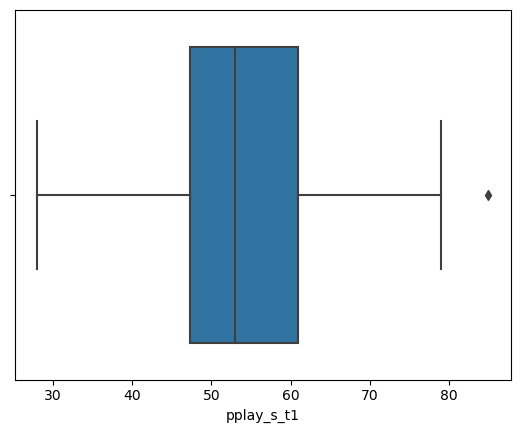

In [62]:
sns.boxplot(df['pplay_s_t1'])

<AxesSubplot:xlabel='pplay_s_t2'>

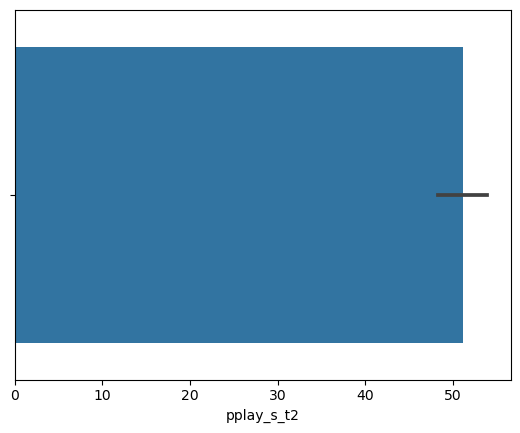

In [63]:
sns.barplot(x = df['pplay_s_t2'])

<AxesSubplot:title={'center':'Number of Wins by Each Team'}>

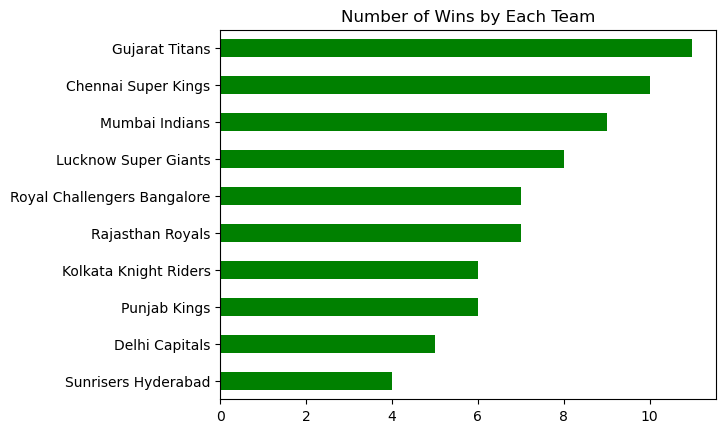

In [64]:
df['winner'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Number of Wins by Each Team', color ='green')

In [65]:
df['winner'].value_counts()

Gujarat Titans                 11
Chennai Super Kings            10
Mumbai Indians                  9
Lucknow Super Giants            8
Rajasthan Royals                7
Royal Challengers Bangalore     7
Punjab Kings                    6
Kolkata Knight Riders           6
Delhi Capitals                  5
Sunrisers Hyderabad             4
Name: winner, dtype: int64

In [66]:
df['toss_decision'].value_counts()

bowl    52
bat     21
Bowl     1
Name: toss_decision, dtype: int64

In [67]:
df['toss_decision'] = df['toss_decision'].replace("Bowl", 'bowl')

In [68]:
df.groupby(['toss_decision'])['toss_winner', 'winner'].value_counts()

toss_decision  toss_winner                  winner                     
bat            Chennai Super Kings          Chennai Super Kings            2
               Sunrisers Hyderabad          Lucknow Super Giants           2
               Royal Challengers Bangalore  Royal Challengers Bangalore    2
               Delhi Capitals               Delhi Capitals                 2
               Rajasthan Royals             Sunrisers Hyderabad            1
               Chennai Super Kings          Punjab Kings                   1
               Gujarat Titans               Gujarat Titans                 1
                                            Kolkata Knight Riders          1
               Kolkata Knight Riders        Kolkata Knight Riders          1
               Mumbai Indians               Mumbai Indians                 1
               Punjab Kings                 Kolkata Knight Riders          1
               Rajasthan Royals             Gujarat Titans                 1
    

#### Toss Decision vs Toss Winner

<AxesSubplot:title={'center':'Toss Decision vs Toss Winner'}, ylabel='toss_decision,toss_winner'>

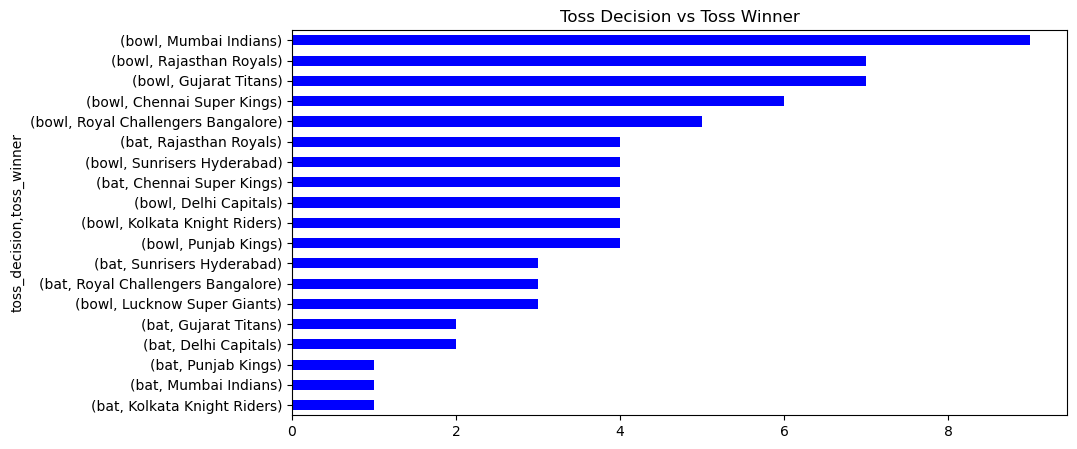

In [69]:
df.groupby(['toss_decision'])['toss_winner'].value_counts().sort_values(ascending=True).plot(kind='barh', color="blue", figsize=(10,5), title = "Toss Decision vs Toss Winner")

In [70]:
#%cd C:\\Users\\nsidd\\IPL_22 Blog\\Teamwise Data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Kolkata Knight Riders'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Sunrisers Hyderabad'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Chennai Super Kings'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Punjab Kings')])

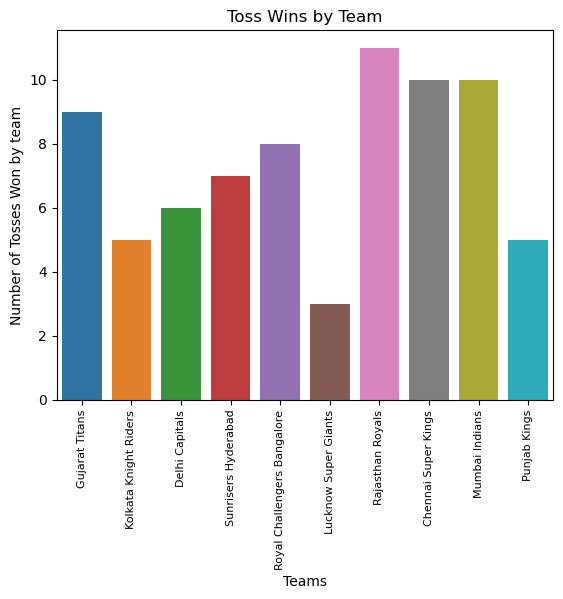

In [71]:
sns.countplot('toss_winner', data=df)
plt.title("Toss Wins by Team")
plt.ylabel('Number of Tosses Won by team')
plt.xlabel('Teams')
plt.xticks(rotation= 'vertical',size=8)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

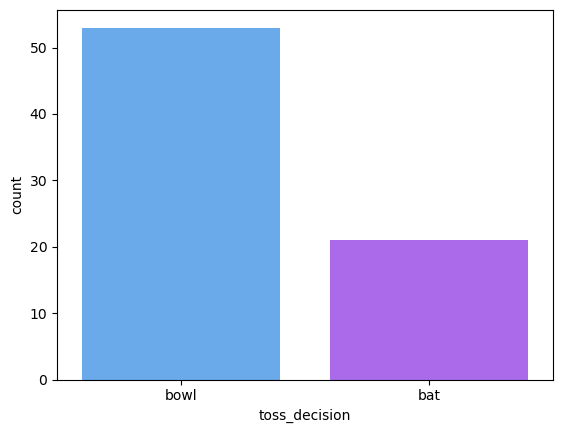

In [72]:
sns.countplot('toss_decision', data=df,palette="cool")

In [73]:
df['toss_decision'].value_counts(normalize = True)

bowl    0.716216
bat     0.283784
Name: toss_decision, dtype: float64

#### 78% of time teams have decided to Bowl First 😃

<AxesSubplot:title={'center':'Matches Played at Venue & City'}, ylabel='venue,city'>

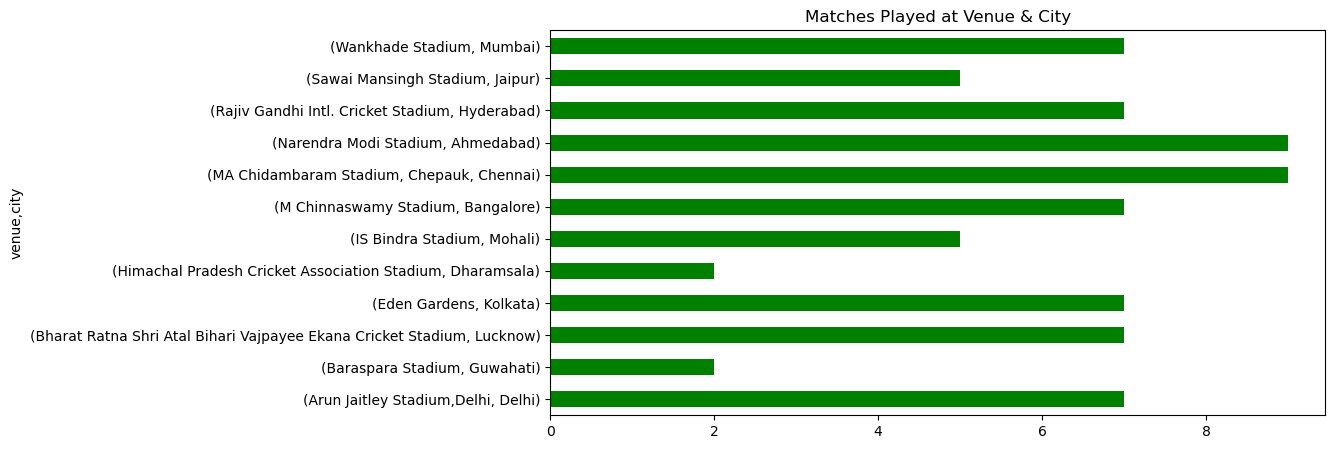

In [74]:
df.groupby(['venue'])['city'].value_counts().plot(kind="barh",figsize=(10,5), color="Green", title = "Matches Played at Venue & City")

<AxesSubplot:title={'center':'Top 15 MOM Awards won by players in 2023 Season'}>

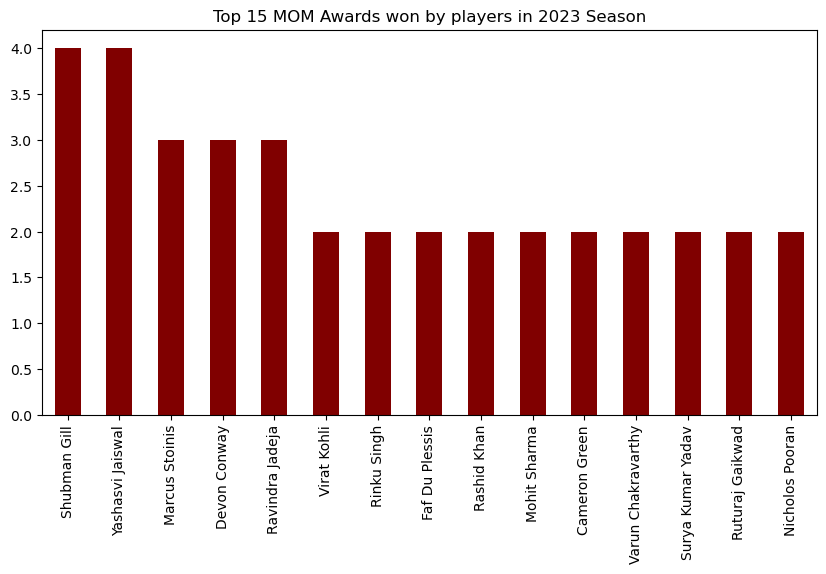

In [75]:
df['player_of_match'].value_counts().sort_values(ascending = False)[0:15].plot(kind='bar',figsize=(10,5),color='maroon', title = 'Top 15 MOM Awards won by players in 2023 Season')

#### Teamwise Data Analysis

In [76]:
%cd C:\Users\nsidd\OneDrive\Desktop\IPL 2023\TeamwiseData_IPL23

C:\Users\nsidd\OneDrive\Desktop\IPL 2023\TeamwiseData_IPL23


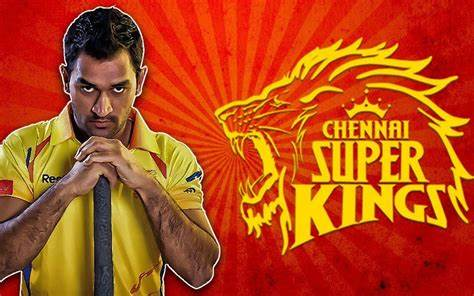

In [77]:
csk = pd.read_excel('CSK.xlsx')
csk.drop(['id','season','date','dl_applied'],axis=1,inplace=True)
csk.head(3)

,city,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,Ahmedabad,Chennai Super Kings,51,2,Gujarat Titans,65,2,Gujarat Titans,bowl,normal,Gujarat Titans,0,5,Rashid Khan,Narendra Modi Stadium
1,Chennai,Chennai Super Kings,79,0,Lucknow Super Giants,80,1,Lucknow Super Giants,bowl,normal,Chennai Super Kings,12,0,Moeen Ali,"MA Chidambaram Stadium, Chepauk"
2,Mumbai,Chennai Super Kings,68,1,Mumbai Indians,61,1,Chennai Super Kings,bowl,normal,Chennai Super Kings,0,7,Ravindra Jadeja,Wankhade Stadium


#### Function to get all Data related to Powerplay wrt Batting. 

In [78]:
def PP_Batting(i, ** kwargs):
    # --------------------->Runs Scored<-----------------------------------------------------
    runs_scored = int(i['pplay_s_t1'].sum())    
    
    # --------------------->Wickets Lost in PP<-----------------------------------------------
    wickets_lost = i['pplay_w_t1'].sum()
    
    # --------------------->Player of the Match<----------------------------------------------
    mom = i['player_of_match'].value_counts()
    
    # ----------------------> Number of Matches <---------------------------------------------
    print("<---------------------------Number of Wins Team Wise-------------------------------->")  
    wins = i['winner'].value_counts()     
    print(wins)
    number_of_matches = int(len(i))
    
    print('<-----------------------Batting Powerplay Stats------------------------------------->')
    toss_wins = i.groupby(['toss_decision'])['toss_winner'].value_counts()
    print("Toss Wins \n",toss_wins)
    print('<--------------------------------------------------------------->')
    print("Player of the Match")
    print('<--------------------------------------------------------------->')
    print("Man of the Match \n", mom)
    print('<--------------------------------------------------------------->')
    min_pp_score = i['pplay_s_t1'].min()
    print("Lowest PP Score while Batting:-",min_pp_score)
    print('<--------------------------------------------------------------->')
    max_pp_score = i['pplay_s_t1'].max()
    print("Highest PP Score while Batting:-",max_pp_score)
    print('<--------------------------------------------------------------->')
    wicketless_pp = len(i[i['pplay_w_t1']==0])
    print("No. of times Wicketless in PP while Batting:-",wicketless_pp)
    print('<--------------------------------------------------------------->')
    max_wickets_lost = i['pplay_w_t1'].max()
    print("Max Wickets Lost in PP:- ",max_wickets_lost)
    print('<--------------------------------------------------------------->')
    score_mean = len(i[i['pplay_s_t1']>=i['pplay_s_t1'].mean()])
    print('No. times Score is greater than Avg. PP Score:-', score_mean)
    overs_bowled = number_of_matches*6
    print("Overs Bowled",overs_bowled)
    avg_pp = round(runs_scored/number_of_matches,2)
    rpo = round(runs_scored/overs_bowled,2)
    Stats = pd.DataFrame.from_dict({"Matches Played":int(number_of_matches),'Runs Scored in PP':int(runs_scored),'wickets_lost':int(wickets_lost), "Average Powerplay Score":avg_pp,"Runs Per Over":rpo, "Highest Score in PP":int(max_pp_score), "Lowest Score in PP":int(min_pp_score), "Number of times Wicketless in PP":int(wicketless_pp),"Max Wickets lost":int(max_wickets_lost), 'No. of Times Score > Mean PP Score':int(score_mean)}, orient='index', columns=['Value'])
    Stats = Stats.transpose()
    return Stats

In [79]:
PP_Batting(csk)

<---------------------------Number of Wins Team Wise-------------------------------->
Chennai Super Kings      10
Rajasthan Royals          2
Gujarat Titans            1
Punjab Kings              1
Kolkata Knight Riders     1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
bat            Chennai Super Kings            4
               Rajasthan Royals               1
bowl           Chennai Super Kings            5
               Gujarat Titans                 2
               Kolkata Knight Riders          1
               Lucknow Super Giants           1
               Royal Challengers Bangalore    1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of the Match 
 Ravindra Jadeja        3
Devon Conway           3
Ruturaj Gaikwad  

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,15.0,823.0,9.0,54.87,9.14,79.0,42.0,7.0,2.0,6.0


In [80]:
#csk['player_of_match'].value_counts().plot(kind='barh')
csk.groupby(['winner'])['player_of_match'].value_counts()

winner                 player_of_match    
Chennai Super Kings    Ravindra Jadeja        3
                       Devon Conway           2
                       Ruturaj Gaikwad        2
                       Ajinkya Rahane         1
                       Matheesha Pathirana    1
                       Moeen Ali              1
Gujarat Titans         Rashid Khan            1
Kolkata Knight Riders  Rinku Singh            1
Punjab Kings           Devon Conway           1
Rajasthan Royals       Ravichandran Ashwin    1
                       Yashasvi Jaiswal       1
Name: player_of_match, dtype: int64

In [81]:
# toss Decision, toss winner, MOM, No. of matches, Runs in PP, Wickets Lost, Avg PP Runs, Overs Bowled, RPO, Max & min PP runs, Wicketless

#### Function to get all Data related to Powerplay wrt Bowling. 

In [82]:
df.head(1
       )

,city,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,Ahmedabad,Chennai Super Kings,51,2,Gujarat Titans,65.0,2.0,Gujarat Titans,bowl,normal,Gujarat Titans,0,5,Rashid Khan,Narendra Modi Stadium


In [83]:
def PP_Bowling(i):
    # --------------------->Runs Conceeded<-----------------------------------------------------
    runs_conceeded = i['pplay_s_t2'].sum()
    
    # --------------------->Wickets Lost in PP<-----------------------------------------------
    
    wickets_picked = i['pplay_w_t2'].sum()
    
    
    # ----------------------> Number of Matches <---------------------------------------------
    number_of_matches = len(i)
    
    min_pp_runs_conceeded = i['pplay_s_t2'].min()
    #print("Lowest Runs Conceeded in PP",min_pp_runs_conceeded)
    #print('<--------------------------------------------------------------->')
    max_pp_runs_conceeded = i['pplay_s_t2'].max()
    #print("Highest Runs Conceeded in PP",max_pp_runs_conceeded)
    #print('<--------------------------------------------------------------->')
    max_wickets_picked = i['pplay_w_t2'].max()
    #print(max_wickets_picked)
    
    overs_bowled = len(i)*6
    
    economy = round(runs_conceeded/overs_bowled,2)
    

    Stats_Bowling = pd.DataFrame.from_dict({"Matches Played":number_of_matches,'Runs Conceeded':runs_conceeded,'Wickets Picked':wickets_picked, "Economy":economy,"Total Overs Bowled":overs_bowled, "Lowest Conceeded Runs":min_pp_runs_conceeded,"Highest Conceeded Runs":max_pp_runs_conceeded, "Max Wickets Picked in PP":max_wickets_picked}, orient='index', columns=['Value'])
    Stats_Bowling = Stats_Bowling.transpose()
    return Stats_Bowling

In [84]:
PP_Bowling(csk)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,15.0,811.0,25.0,9.01,90.0,34.0,80.0,3.0


In [85]:
csk[csk['pplay_w_t1']==0]

,city,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,Chennai,Chennai Super Kings,79,0,Lucknow Super Giants,80,1,Lucknow Super Giants,bowl,normal,Chennai Super Kings,12,0,Moeen Ali,"MA Chidambaram Stadium, Chepauk"
5,Chennai,Chennai Super Kings,60,0,Sunrisers Hyderabad,45,1,Chennai Super Kings,bowl,normal,Chennai Super Kings,0,7,Ravindra Jadeja,"MA Chidambaram Stadium, Chepauk"
6,Kolkata,Chennai Super Kings,59,0,Kolkata Knight Riders,38,2,Kolkata Knight Riders,bowl,normal,Chennai Super Kings,49,0,Ajinkya Rahane,Eden Gardens
8,Chennai,Chennai Super Kings,57,0,Punjab Kings,62,1,Chennai Super Kings,bat,normal,Punjab Kings,0,4,Devon Conway,"MA Chidambaram Stadium, Chepauk"
12,Delhi,Chennai Super Kings,52,0,Delhi Capitals,34,3,Chennai Super Kings,bat,normal,Chennai Super Kings,77,0,Ruturaj Gaikwad,"Arun Jaitley Stadium,Delhi"
13,Chennai,Chennai Super Kings,49,0,Gujarat Titans,41,2,Gujarat Titans,bowl,normal,Chennai Super Kings,15,0,Ruturaj Gaikwad,"MA Chidambaram Stadium, Chepauk"
14,Ahmedabad,Chennai Super Kings,52,0,Gujarat Titans,62,0,Chennai Super Kings,bowl,normal,Chennai Super Kings,0,5,Devon Conway,Narendra Modi Stadium


#### Overall Powerplay Runs & Wickets Stats of CSK vs Other Teams

In [86]:
df.head(1)

,city,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,Ahmedabad,Chennai Super Kings,51,2,Gujarat Titans,65.0,2.0,Gujarat Titans,bowl,normal,Gujarat Titans,0,5,Rashid Khan,Narendra Modi Stadium


<AxesSubplot:title={'center':'Wickets Picked by CSK Vs Each Team'}, ylabel='team2'>

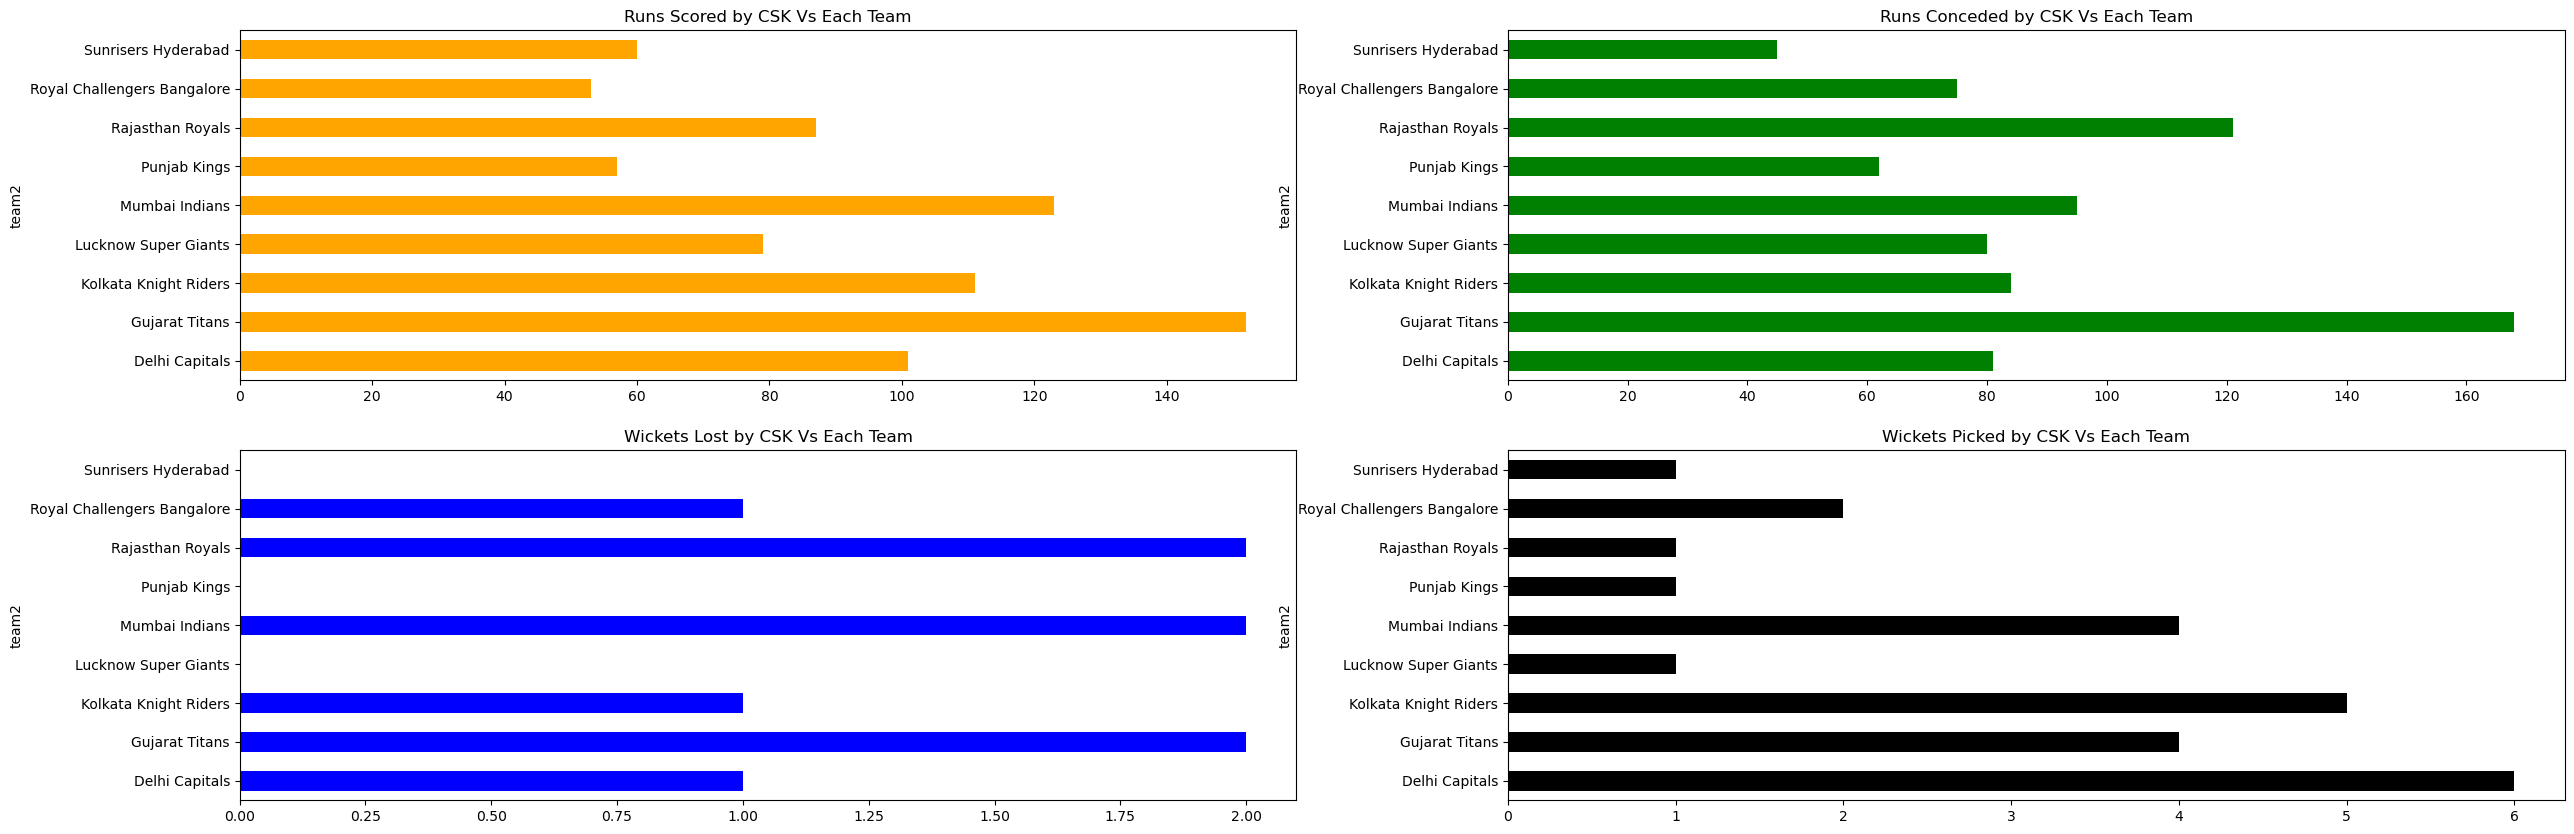

In [87]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
csk.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by CSK Vs Each Team")
csk.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by CSK Vs Each Team")
csk.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by CSK Vs Each Team")
csk.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by CSK Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

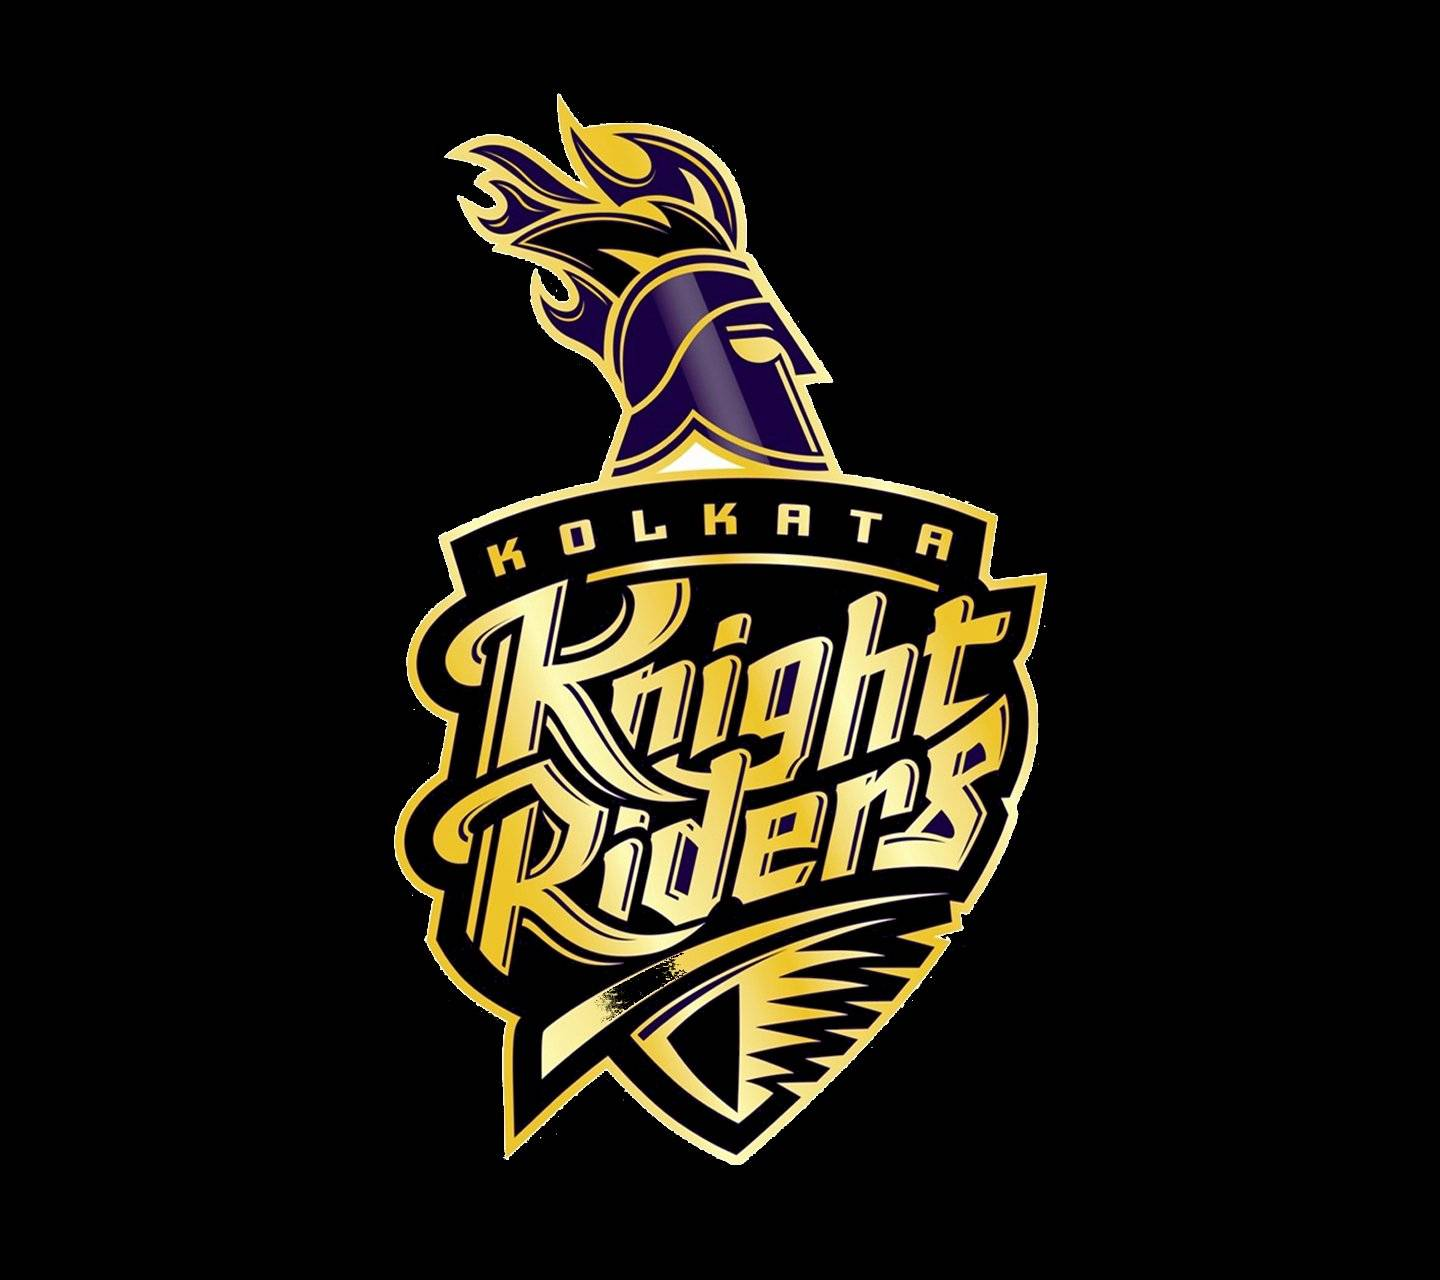

In [88]:
kkr = pd.read_excel('KKR.xlsx')
kkr.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23002,2023,Mohali,2023-04-01,Kolkata Knight Riders,46,3,Punjab Kings,56,1,Kolkata Knight Riders,bowl,normal,0,Punjab Kings,7,0,Arshdeep Singh,IS Bindra Stadium
1,23009,2023,Kolkata,2023-04-06,Kolkata Knight Riders,47,2,Royal Challengers Bangalore,50,2,Royal Challengers Bangalore,bowl,normal,0,Kolkata Knight Riders,81,0,Shardul Thakur,Eden Gardens
2,23013,2023,Ahmedabad,2023-04-09,Kolkata Knight Riders,43,2,Gujarat Titans,54,1,Gujarat Titans,bat,normal,0,Kolkata Knight Riders,0,3,Rinku Singh,Narendra Modi Stadium


In [89]:
PP_Batting(kkr)

<---------------------------Number of Wins Team Wise-------------------------------->
Kolkata Knight Riders    6
Punjab Kings             1
Sunrisers Hyderabad      1
Mumbai Indians           1
Delhi Capitals           1
Chennai Super Kings      1
Gujarat Titans           1
Rajasthan Royals         1
Lucknow Super Giants     1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
bat            Chennai Super Kings            1
               Gujarat Titans                 1
               Kolkata Knight Riders          1
               Punjab Kings                   1
bowl           Kolkata Knight Riders          4
               Royal Challengers Bangalore    2
               Delhi Capitals                 1
               Gujarat Titans                 1
               Mumbai Indians                 1
               Rajasthan Royals               1
Name: toss_winner, dtyp

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,700.0,29.0,50.0,8.33,66.0,35.0,1.0,3.0,6.0


In [90]:
PP_Bowling(kkr)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,822.0,21.0,9.79,84.0,50.0,78.0,3.0


In [91]:
kkr

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23002,2023,Mohali,2023-04-01,Kolkata Knight Riders,46,3,Punjab Kings,56,1,Kolkata Knight Riders,bowl,normal,0,Punjab Kings,7,0,Arshdeep Singh,IS Bindra Stadium
1,23009,2023,Kolkata,2023-04-06,Kolkata Knight Riders,47,2,Royal Challengers Bangalore,50,2,Royal Challengers Bangalore,bowl,normal,0,Kolkata Knight Riders,81,0,Shardul Thakur,Eden Gardens
2,23013,2023,Ahmedabad,2023-04-09,Kolkata Knight Riders,43,2,Gujarat Titans,54,1,Gujarat Titans,bat,normal,0,Kolkata Knight Riders,0,3,Rinku Singh,Narendra Modi Stadium
3,23019,2023,Kolkata,2023-04-14,Kolkata Knight Riders,62,3,Sunrisers Hyderabad,65,2,Kolkata Knight Riders,bowl,normal,0,Sunrisers Hyderabad,23,0,Harry Brooks,Eden Gardens
4,23022,2023,Mumbai,2023-04-16,Kolkata Knight Riders,57,2,Mumbai Indians,72,1,Mumbai Indians,bowl,normal,0,Mumbai Indians,0,5,Venkatesh Iyer,Wankhade Stadium
5,23028,2023,Delhi,2023-04-20,Kolkata Knight Riders,35,3,Delhi Capitals,61,1,Delhi Capitals,bowl,normal,0,Delhi Capitals,0,4,Ishant Sharma,"Arun Jaitley Stadium,Delhi"
6,23033,2023,Kolkata,2023-04-23,Kolkata Knight Riders,38,2,Chennai Super Kings,59,0,Kolkata Knight Riders,bowl,normal,0,Chennai Super Kings,49,0,Ajinkya Rahane,Eden Gardens
7,23036,2023,Bangalore,2023-04-26,Kolkata Knight Riders,66,0,Royal Challengers Bangalore,58,3,Royal Challengers Bangalore,bowl,normal,0,Kolkata Knight Riders,21,0,Varun Chakravarthy,M Chinnaswamy Stadium
8,23039,2023,Kolkata,2023-04-29,Kolkata Knight Riders,61,2,Gujarat Titans,52,1,Gujarat Titans,bowl,normal,0,Gujarat Titans,0,7,Joshua Little,Eden Gardens
9,23047,2023,Hyderabad,2023-05-04,Kolkata Knight Riders,49,3,Sunrisers Hyderabad,53,3,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,Varun Chakravarthy,Rajiv Gandhi Intl. Cricket Stadium




#### Overall Powerplay Runs & Wickets Stats of KKR vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by KKR Vs Each Team'}, ylabel='team2'>

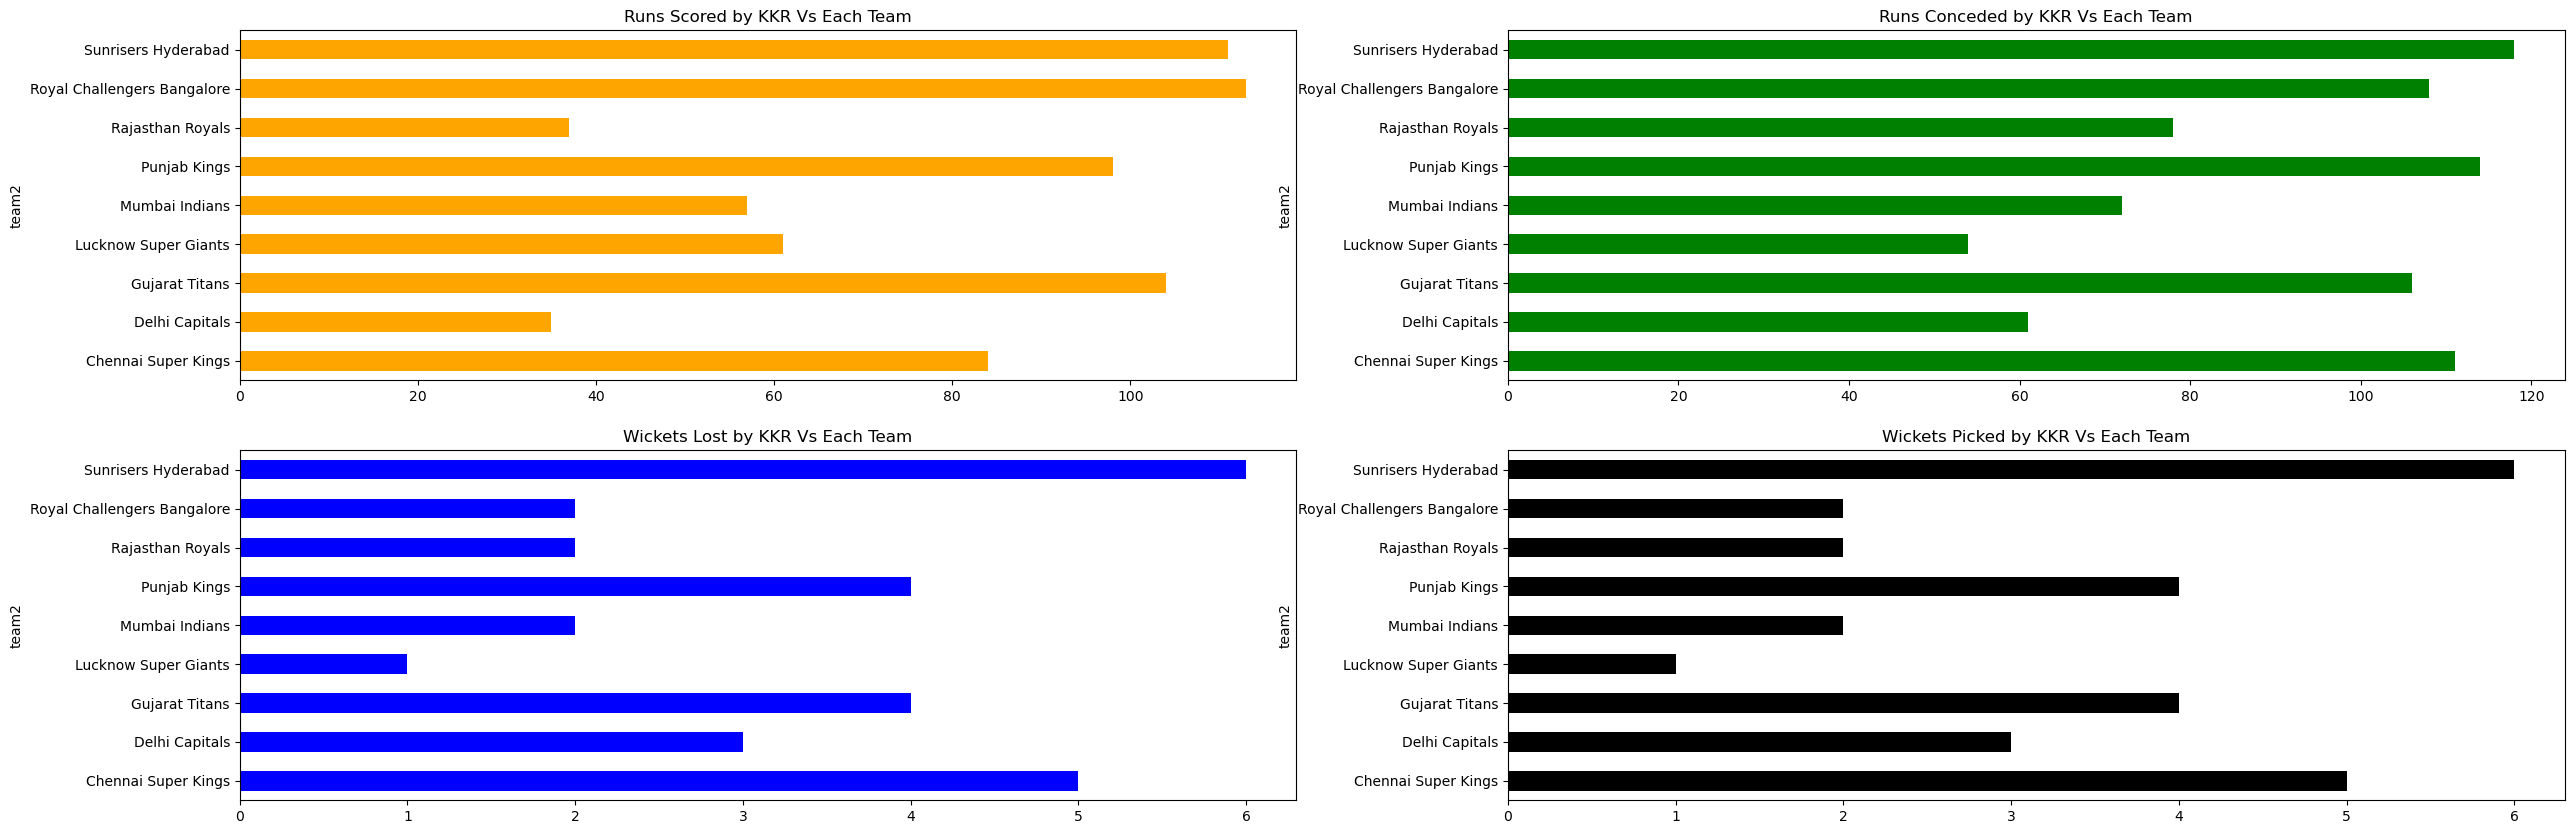

In [92]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
kkr.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by KKR Vs Each Team")
kkr.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by KKR Vs Each Team")
kkr.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by KKR Vs Each Team")
kkr.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by KKR Vs Each Team")

In [93]:
PP_Bowling(kkr)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,822.0,21.0,9.79,84.0,50.0,78.0,3.0


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

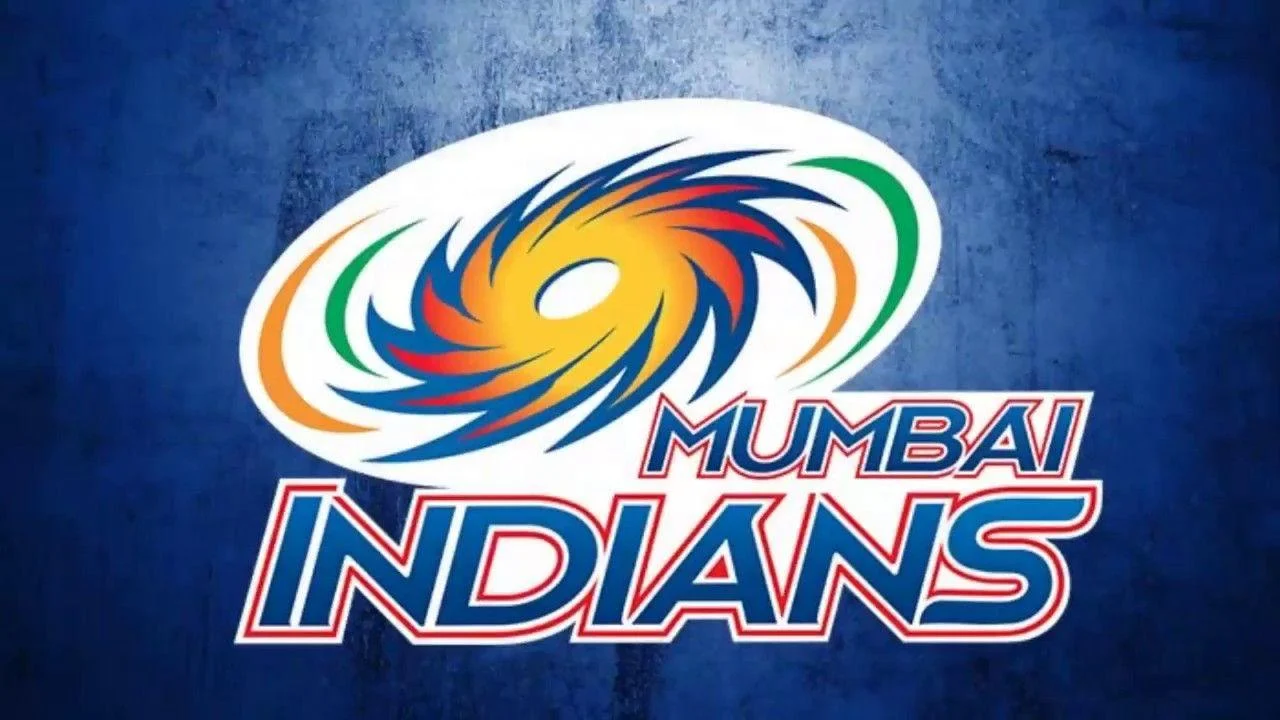

In [94]:
MI = pd.read_excel("MI.xlsx")
MI.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23005,2023,Bangalore,2023-04-02,Mumbai Indians,29,3,Royal Challengers Bangalore,53,0,Royal Challengers Bangalore,bowl,normal,0,Royal Challengers Bangalore,0,8,Faf Du Plessis,M Chinnaswamy Stadium
1,23012,2023,Mumbai,2023-04-08,Mumbai Indians,61,1,Chennai Super Kings,68,1,Chennai Super Kings,bowl,normal,0,Chennai Super Kings,0,7,Ravindra Jadeja,Wankhade Stadium
2,23016,2023,Delhi,2023-04-11,Mumbai Indians,68,0,Delhi Capitals,51,1,Mumbai Indians,bowl,normal,0,Mumbai Indians,0,6,Rohit Sharma,"Arun Jaitley Stadium,Delhi"


In [95]:
PP_Batting(MI)

<---------------------------Number of Wins Team Wise-------------------------------->
Mumbai Indians                 9
Chennai Super Kings            2
Gujarat Titans                 2
Royal Challengers Bangalore    1
Punjab Kings                   1
Lucknow Super Giants           1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
bat            Mumbai Indians                 1
               Rajasthan Royals               1
bowl           Mumbai Indians                 9
               Chennai Super Kings            2
               Gujarat Titans                 1
               Royal Challengers Bangalore    1
               Sunrisers Hyderabad            1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of the Match 
 Cameron G

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,16.0,887.0,22.0,55.44,9.24,72.0,29.0,3.0,3.0,10.0


In [96]:
PP_Bowling(MI)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,16.0,845.0,19.0,8.8,96.0,35.0,68.0,3.0


#### Overall Powerplay Runs & Wickets Stats of MI vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by MI Vs Each Team'}, ylabel='team2'>

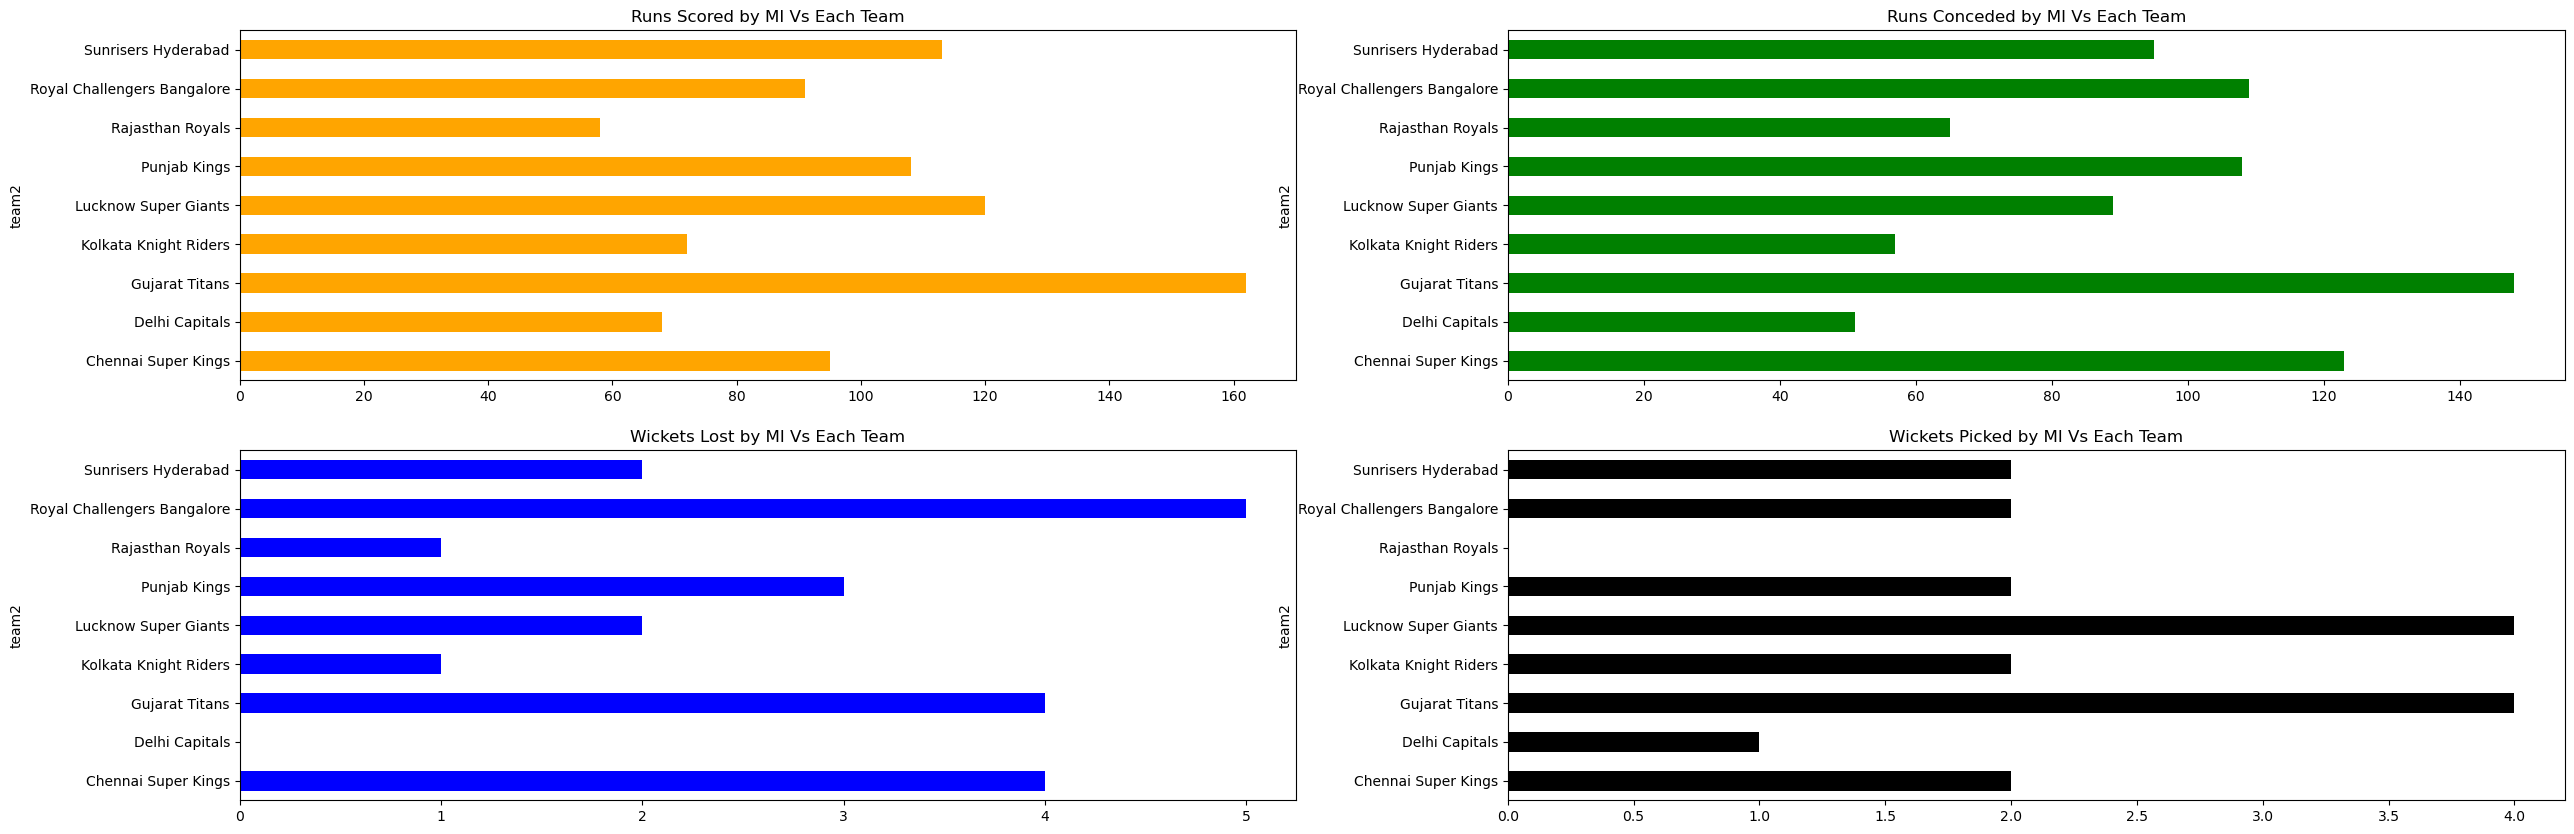

In [97]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
MI.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by MI Vs Each Team")
MI.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by MI Vs Each Team")
MI.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by MI Vs Each Team")
MI.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by MI Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

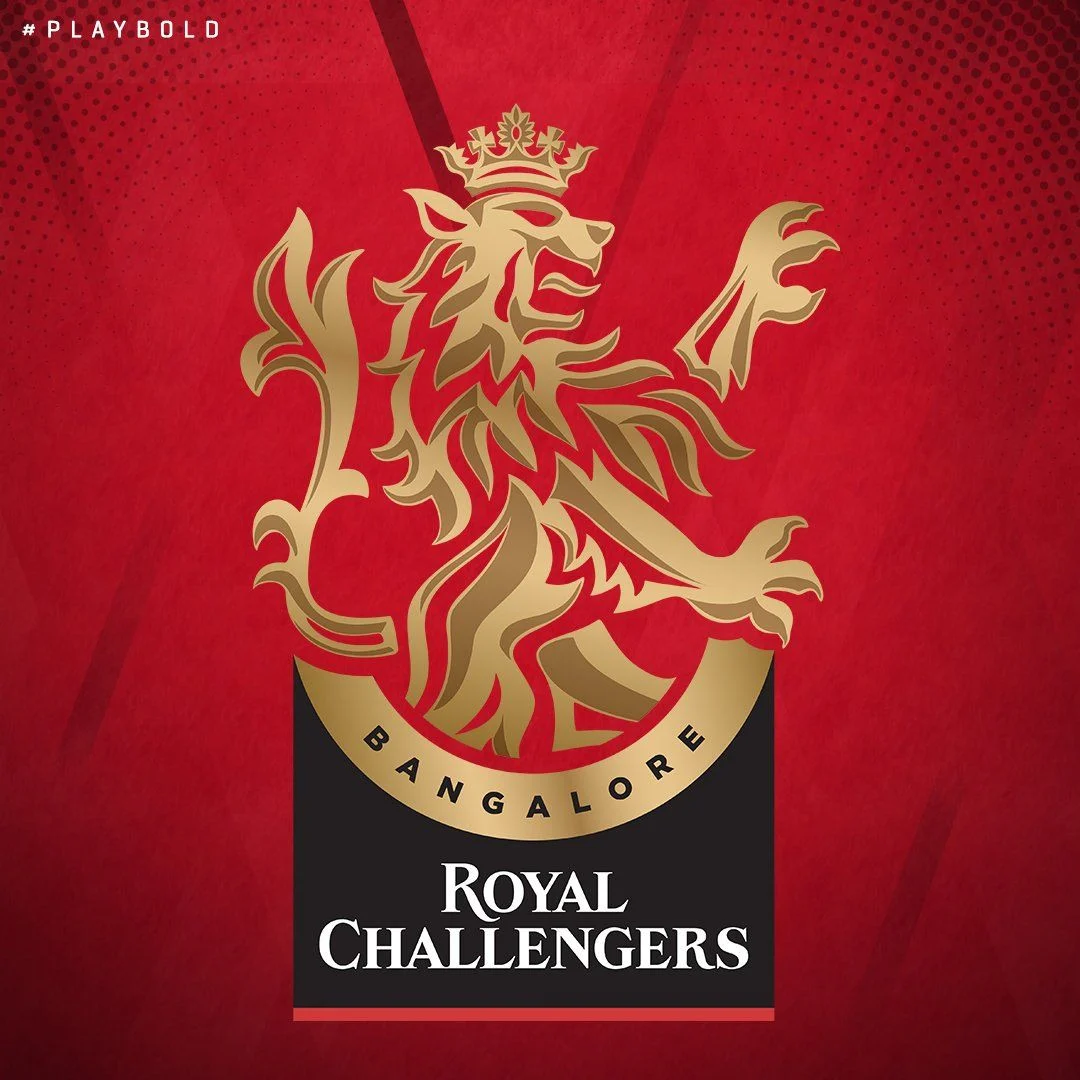

In [98]:
RCB = pd.read_excel('RCB.xlsx')
RCB.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23005,2023,Bangalore,2023-04-02,Royal Challengers Bangalore,53,0,Mumbai Indians,29,3,Royal Challengers Bangalore,bowl,normal,0,Royal Challengers Bangalore,0,8,Faf Du Plessis,M Chinnaswamy Stadium
1,23009,2023,Kolkata,2023-04-06,Royal Challengers Bangalore,50,2,Kolkata Knight Riders,47,2,Royal Challengers Bangalore,bowl,normal,0,Kolkata Knight Riders,81,0,Shardul Thakur,Eden Gardens
2,23015,2023,Bangalore,2023-04-10,Royal Challengers Bangalore,56,0,Lucknow Super Giants,37,3,Lucknow Super Giants,bowl,normal,0,Lucknow Super Giants,0,1,Nicholos Pooran,M Chinnaswamy Stadium


In [99]:
PP_Batting(RCB)

<---------------------------Number of Wins Team Wise-------------------------------->
Royal Challengers Bangalore    7
Kolkata Knight Riders          2
Lucknow Super Giants           1
Chennai Super Kings            1
Delhi Capitals                 1
Mumbai Indians                 1
Gujarat Titans                 1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
bat            Royal Challengers Bangalore    3
bowl           Royal Challengers Bangalore    5
               Delhi Capitals                 1
               Gujarat Titans                 1
               Lucknow Super Giants           1
               Mumbai Indians                 1
               Punjab Kings                   1
               Rajasthan Royals               1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<------------

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,777.0,12.0,55.5,9.25,75.0,42.0,8.0,3.0,8.0


In [100]:
PP_Bowling(RCB)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,654.0,33.0,7.79,84.0,28.0,70.0,5.0


#### Overall Powerplay Runs & Wickets Stats of RCB vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by RCB Vs Each Team'}, ylabel='team2'>

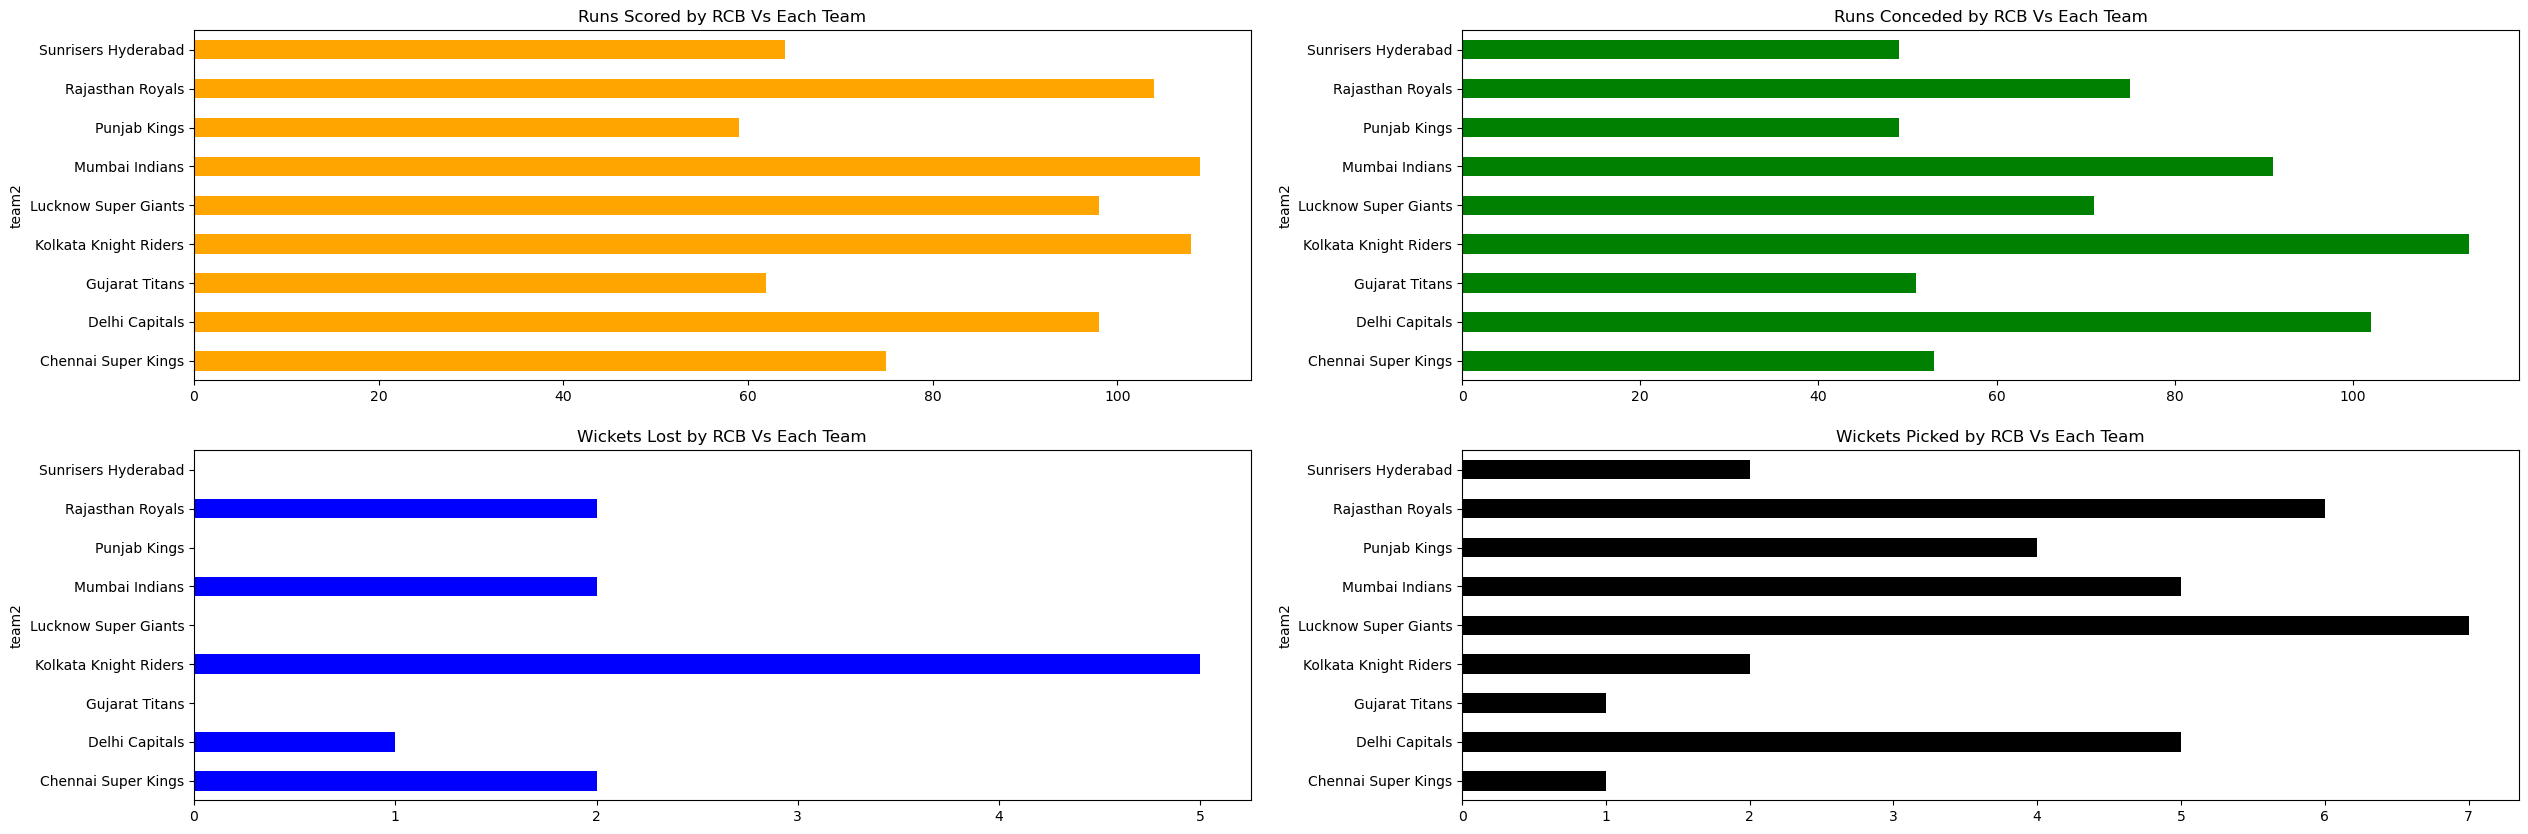

In [101]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
RCB.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by RCB Vs Each Team")
RCB.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by RCB Vs Each Team")
RCB.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axarr[1][0],title="Wickets Lost by RCB Vs Each Team")
RCB.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Black",ax=axarr[1][1],title="Wickets Picked by RCB Vs Each Team")


<AxesSubplot:>

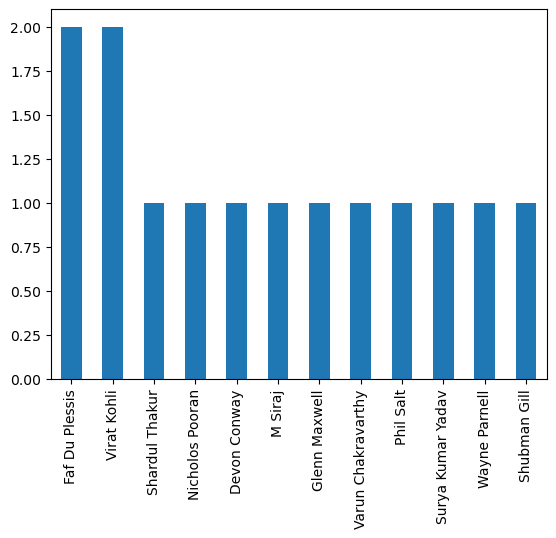

In [102]:
RCB['player_of_match'].value_counts().plot(kind = 'bar')

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

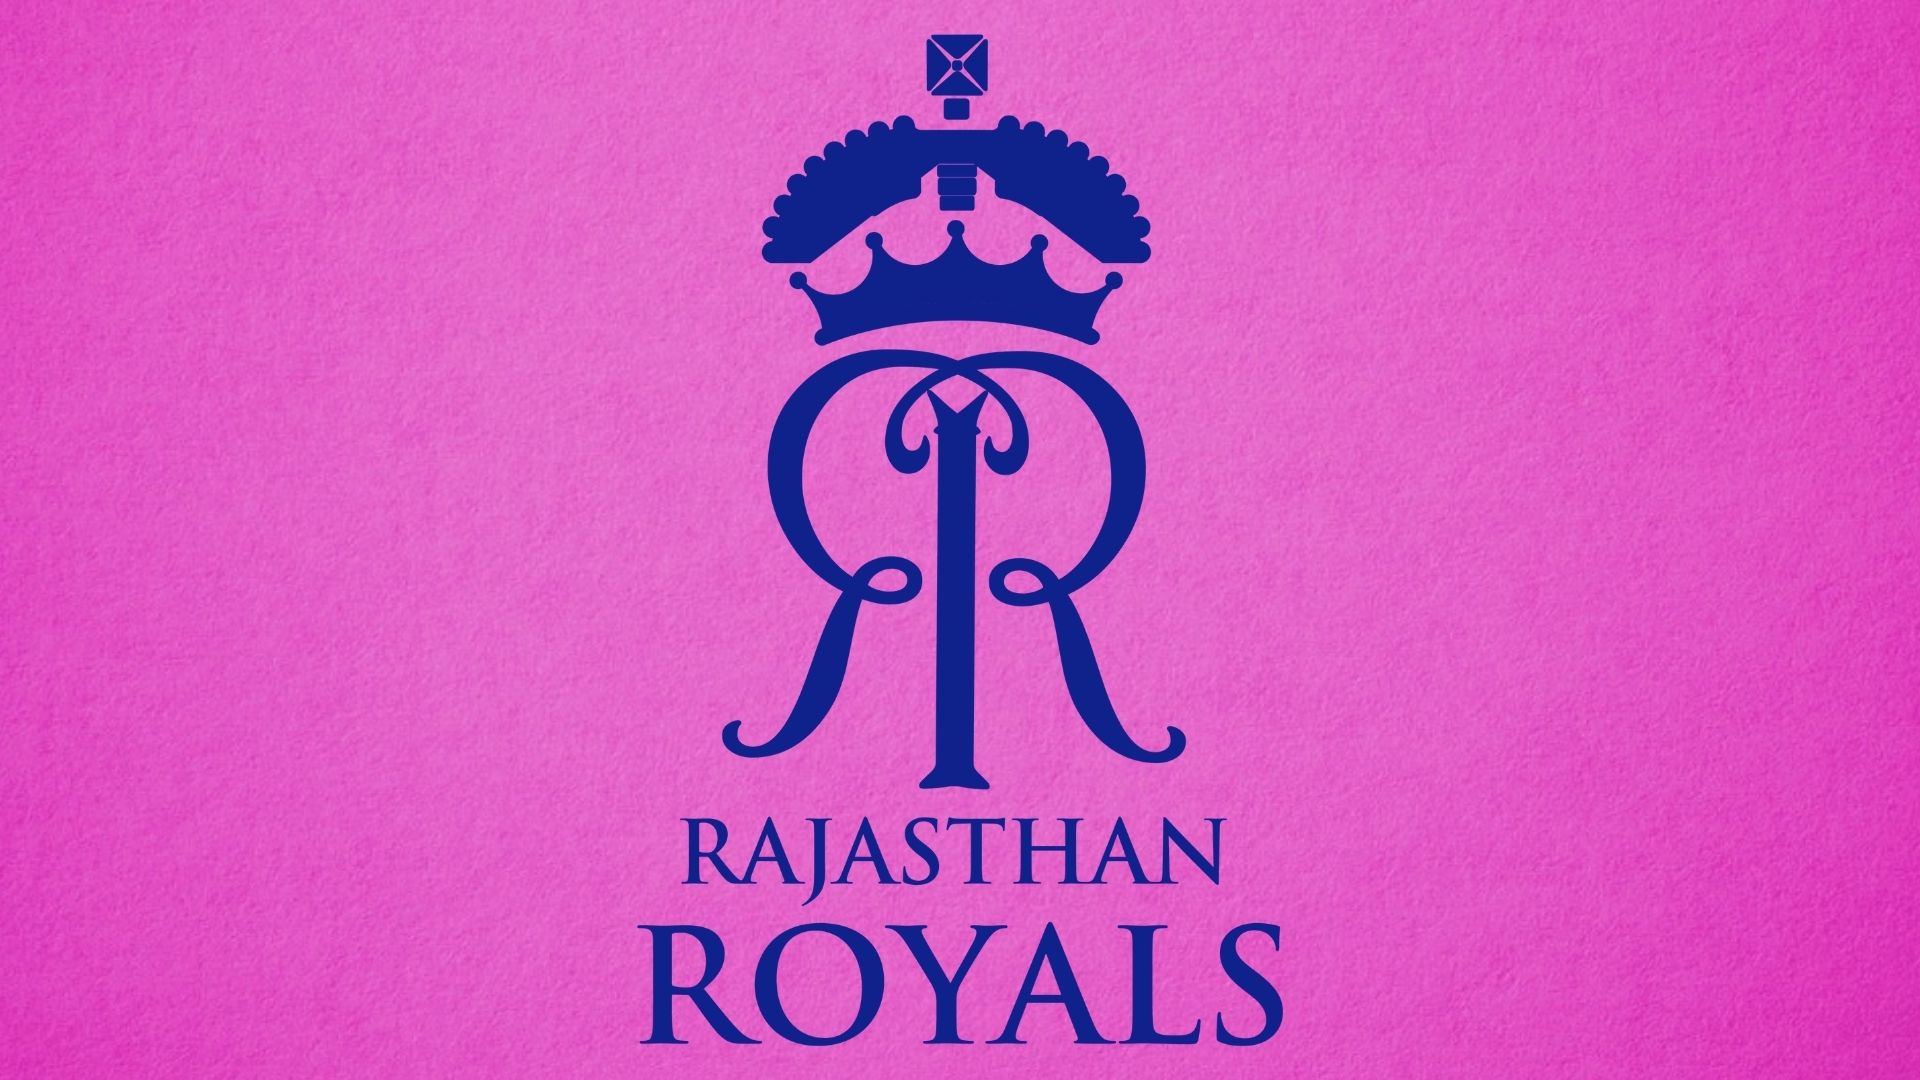

In [103]:
RR = pd.read_excel('RR.xlsx')
RR.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23004,2023,Hyderabad,2023-04-02,Rajasthan Royals,85,1,Sunrisers Hyderabad,30,2,Sunrisers Hyderabad,bowl,normal,0,Rajasthan Royals,72,0,Jos Buttler,Rajiv Gandhi Intl. Cricket Stadium
1,23008,2023,Guwahati,2023-04-05,Rajasthan Royals,57,3,Punjab Kings,63,0,Rajasthan Royals,bowl,normal,0,Punjab Kings,5,0,Nathan Ellis,Baraspara Stadium
2,23011,2023,Guwahati,2023-04-08,Rajasthan Royals,68,0,Delhi Capitals,38,3,Rajasthan Royals,Bowl,normal,0,Rajasthan Royals,57,0,Yashasvi Jaiswal,Baraspara Stadium


In [104]:
PP_Batting(RR)

<---------------------------Number of Wins Team Wise-------------------------------->
Rajasthan Royals               7
Royal Challengers Bangalore    2
Punjab Kings                   1
Lucknow Super Giants           1
Mumbai Indians                 1
Gujarat Titans                 1
Sunrisers Hyderabad            1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bowl           Rajasthan Royals               1
bat            Rajasthan Royals               4
               Royal Challengers Bangalore    1
bowl           Rajasthan Royals               6
               Chennai Super Kings            1
               Sunrisers Hyderabad            1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of the Match 
 Yashasvi Jaiswal       4

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,790.0,18.0,56.43,9.4,85.0,26.0,4.0,5.0,9.0


In [105]:
PP_Bowling(RR)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,645.0,18.0,7.68,84.0,30.0,63.0,3.0


#### Overall Powerplay Runs & Wickets Stats of RR vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by RR Vs Each Team'}, ylabel='team2'>

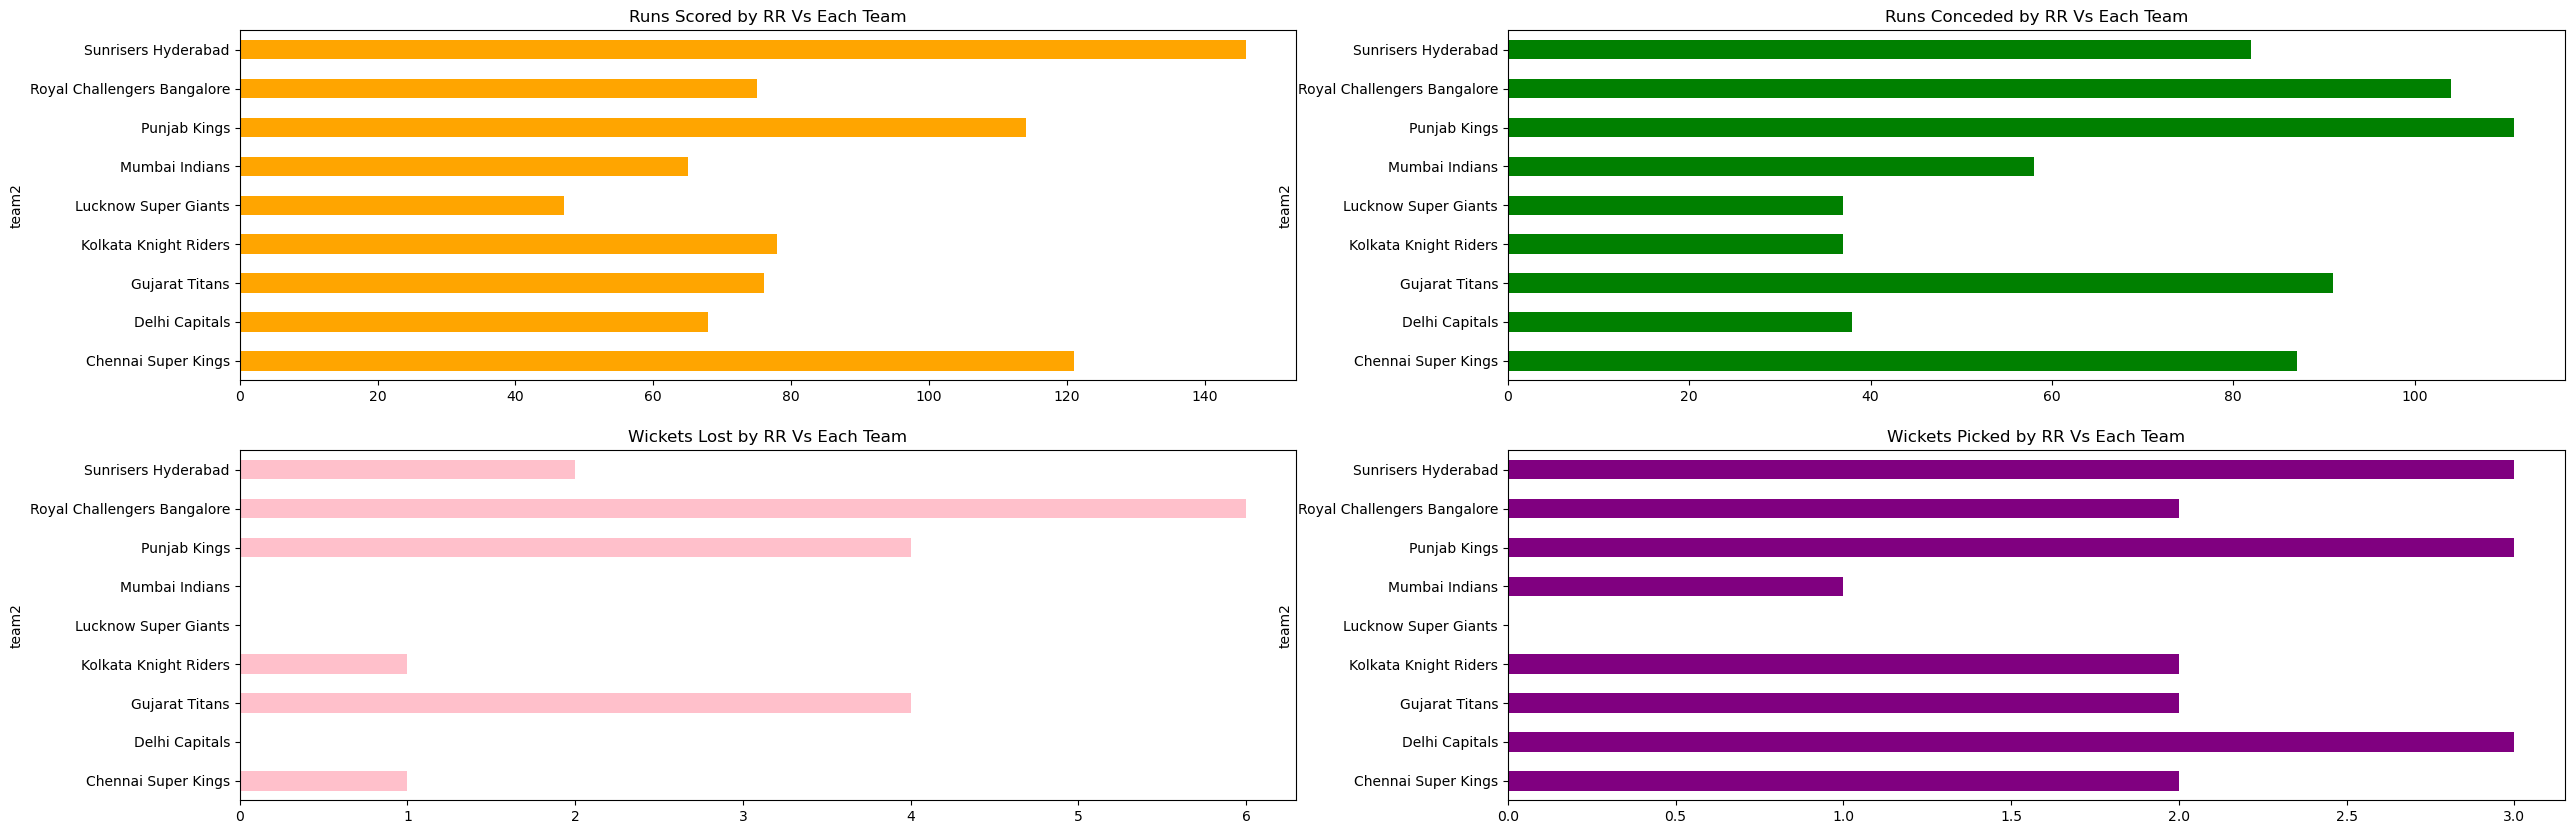

In [106]:
fig, axarr = plt.subplots(2, 2, figsize=(30,10))
RR.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axarr[0][0],title="Runs Scored by RR Vs Each Team")
RR.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axarr[0][1],title="Runs Conceded by RR Vs Each Team")
RR.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Pink",ax=axarr[1][0],title="Wickets Lost by RR Vs Each Team")
RR.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Purple",ax=axarr[1][1],title="Wickets Picked by RR Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

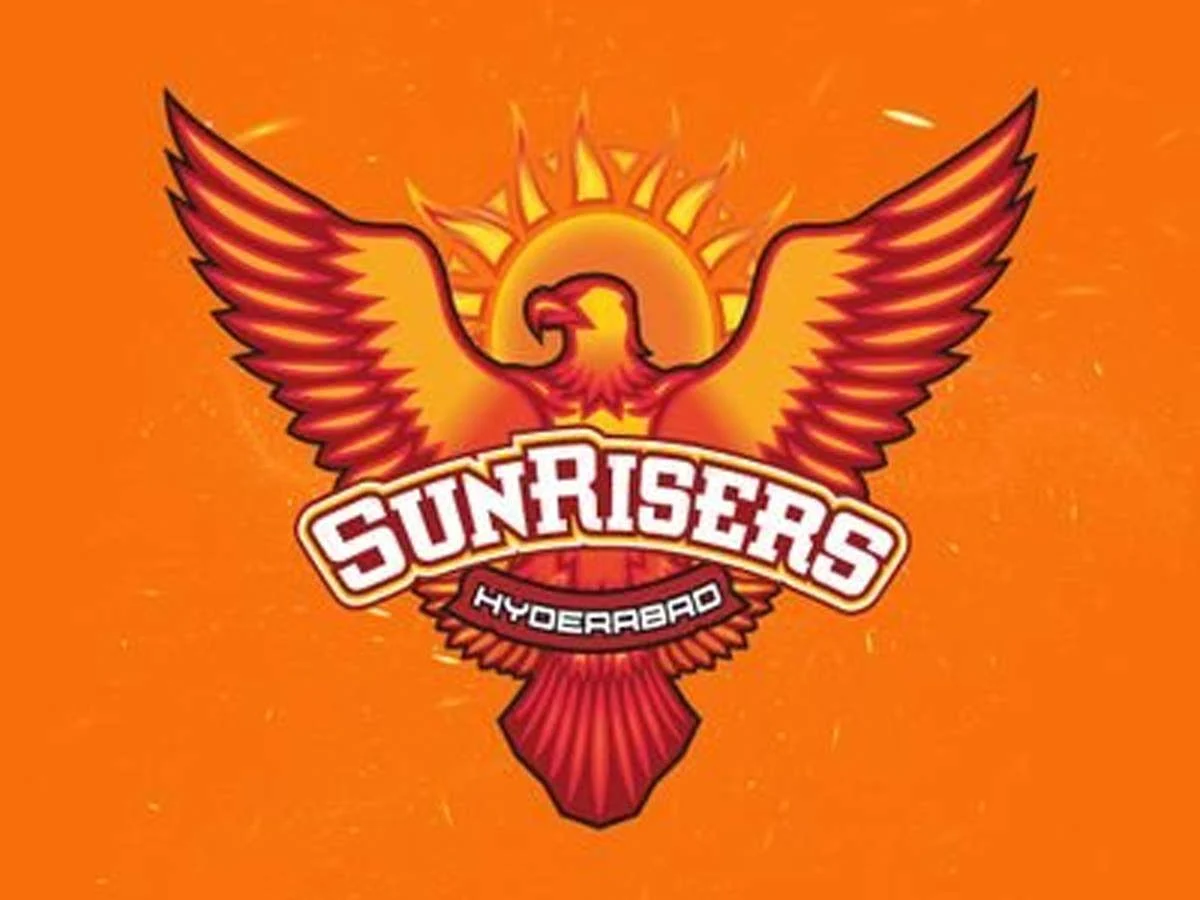

In [107]:
SRH = pd.read_excel("SRH.xlsx")
SRH.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23004,2023,Hyderabad,2023-04-02,Sunrisers Hyderabad,30,2,Rajasthan Royals,85,1,Sunrisers Hyderabad,bowl,normal,0,Rajasthan Royals,72,0,Jos Buttler,Rajiv Gandhi Intl. Cricket Stadium
1,23010,2023,Lucknow,2023-04-07,Sunrisers Hyderabad,43,1,Lucknow Super Giants,45,2,Sunrisers Hyderabad,bat,normal,0,Lucknow Super Giants,0,5,Krunal Pandya,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...
2,23014,2023,Hyderabad,2023-04-09,Sunrisers Hyderabad,34,1,Punjab Kings,41,3,Sunrisers Hyderabad,bowl,normal,0,Sunrisers Hyderabad,0,8,Shikhar Dhawan,Rajiv Gandhi Intl. Cricket Stadium


In [108]:
SRH

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23004,2023,Hyderabad,2023-04-02,Sunrisers Hyderabad,30,2,Rajasthan Royals,85,1,Sunrisers Hyderabad,bowl,normal,0,Rajasthan Royals,72,0,Jos Buttler,Rajiv Gandhi Intl. Cricket Stadium
1,23010,2023,Lucknow,2023-04-07,Sunrisers Hyderabad,43,1,Lucknow Super Giants,45,2,Sunrisers Hyderabad,bat,normal,0,Lucknow Super Giants,0,5,Krunal Pandya,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...
2,23014,2023,Hyderabad,2023-04-09,Sunrisers Hyderabad,34,1,Punjab Kings,41,3,Sunrisers Hyderabad,bowl,normal,0,Sunrisers Hyderabad,0,8,Shikhar Dhawan,Rajiv Gandhi Intl. Cricket Stadium
3,23019,2023,Kolkata,2023-04-14,Sunrisers Hyderabad,65,2,Kolkata Knight Riders,62,3,Kolkata Knight Riders,bowl,normal,0,Sunrisers Hyderabad,23,0,Harry Brooks,Eden Gardens
4,23025,2023,Hyderabad,2023-04-18,Sunrisers Hyderabad,42,2,Mumbai Indians,53,1,Sunrisers Hyderabad,bowl,normal,0,Mumbai Indians,14,0,Cameron Green,Rajiv Gandhi Intl. Cricket Stadium
5,23029,2023,Chennai,2023-04-21,Sunrisers Hyderabad,45,1,Chennai Super Kings,60,0,Chennai Super Kings,bowl,normal,0,Chennai Super Kings,0,7,Ravindra Jadeja,"MA Chidambaram Stadium, Chepauk"
6,23034,2023,Hyderabad,2023-04-24,Sunrisers Hyderabad,36,1,Delhi Capitals,49,2,Delhi Capitals,bat,normal,0,Delhi Capitals,7,0,Axar Patel,Rajiv Gandhi Intl. Cricket Stadium
7,23040,2023,Delhi,2023-04-29,Sunrisers Hyderabad,62,2,Delhi Capitals,57,1,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,9,0,Mitchell Marsh,"Arun Jaitley Stadium,Delhi"
8,23047,2023,Hyderabad,2023-05-04,Sunrisers Hyderabad,53,3,Kolkata Knight Riders,49,3,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,Varun Chakravarthy,Rajiv Gandhi Intl. Cricket Stadium
9,23052,2023,Jaipur,2023-05-07,Sunrisers Hyderabad,52,1,Rajasthan Royals,61,1,Rajasthan Royals,bat,normal,0,Sunrisers Hyderabad,0,4,Glenn Phillips,Sawai Mansingh Stadium


In [109]:
PP_Batting(SRH)

<---------------------------Number of Wins Team Wise-------------------------------->
Sunrisers Hyderabad            4
Lucknow Super Giants           2
Mumbai Indians                 2
Rajasthan Royals               1
Chennai Super Kings            1
Delhi Capitals                 1
Kolkata Knight Riders          1
Gujarat Titans                 1
Royal Challengers Bangalore    1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
bat            Sunrisers Hyderabad            3
               Delhi Capitals                 1
               Kolkata Knight Riders          1
               Rajasthan Royals               1
bowl           Sunrisers Hyderabad            4
               Chennai Super Kings            1
               Kolkata Knight Riders          1
               Mumbai Indians                 1
               Royal Challengers Bangalore    1
Name: toss_winner

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,665.0,24.0,47.5,7.92,65.0,30.0,1.0,4.0,7.0


In [110]:
PP_Bowling(SRH)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,781.0,20.0,9.3,84.0,30.0,85.0,3.0


#### Overall Powerplay Runs & Wickets Stats of SRH vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by SRH Vs Each Team'}, ylabel='team2'>

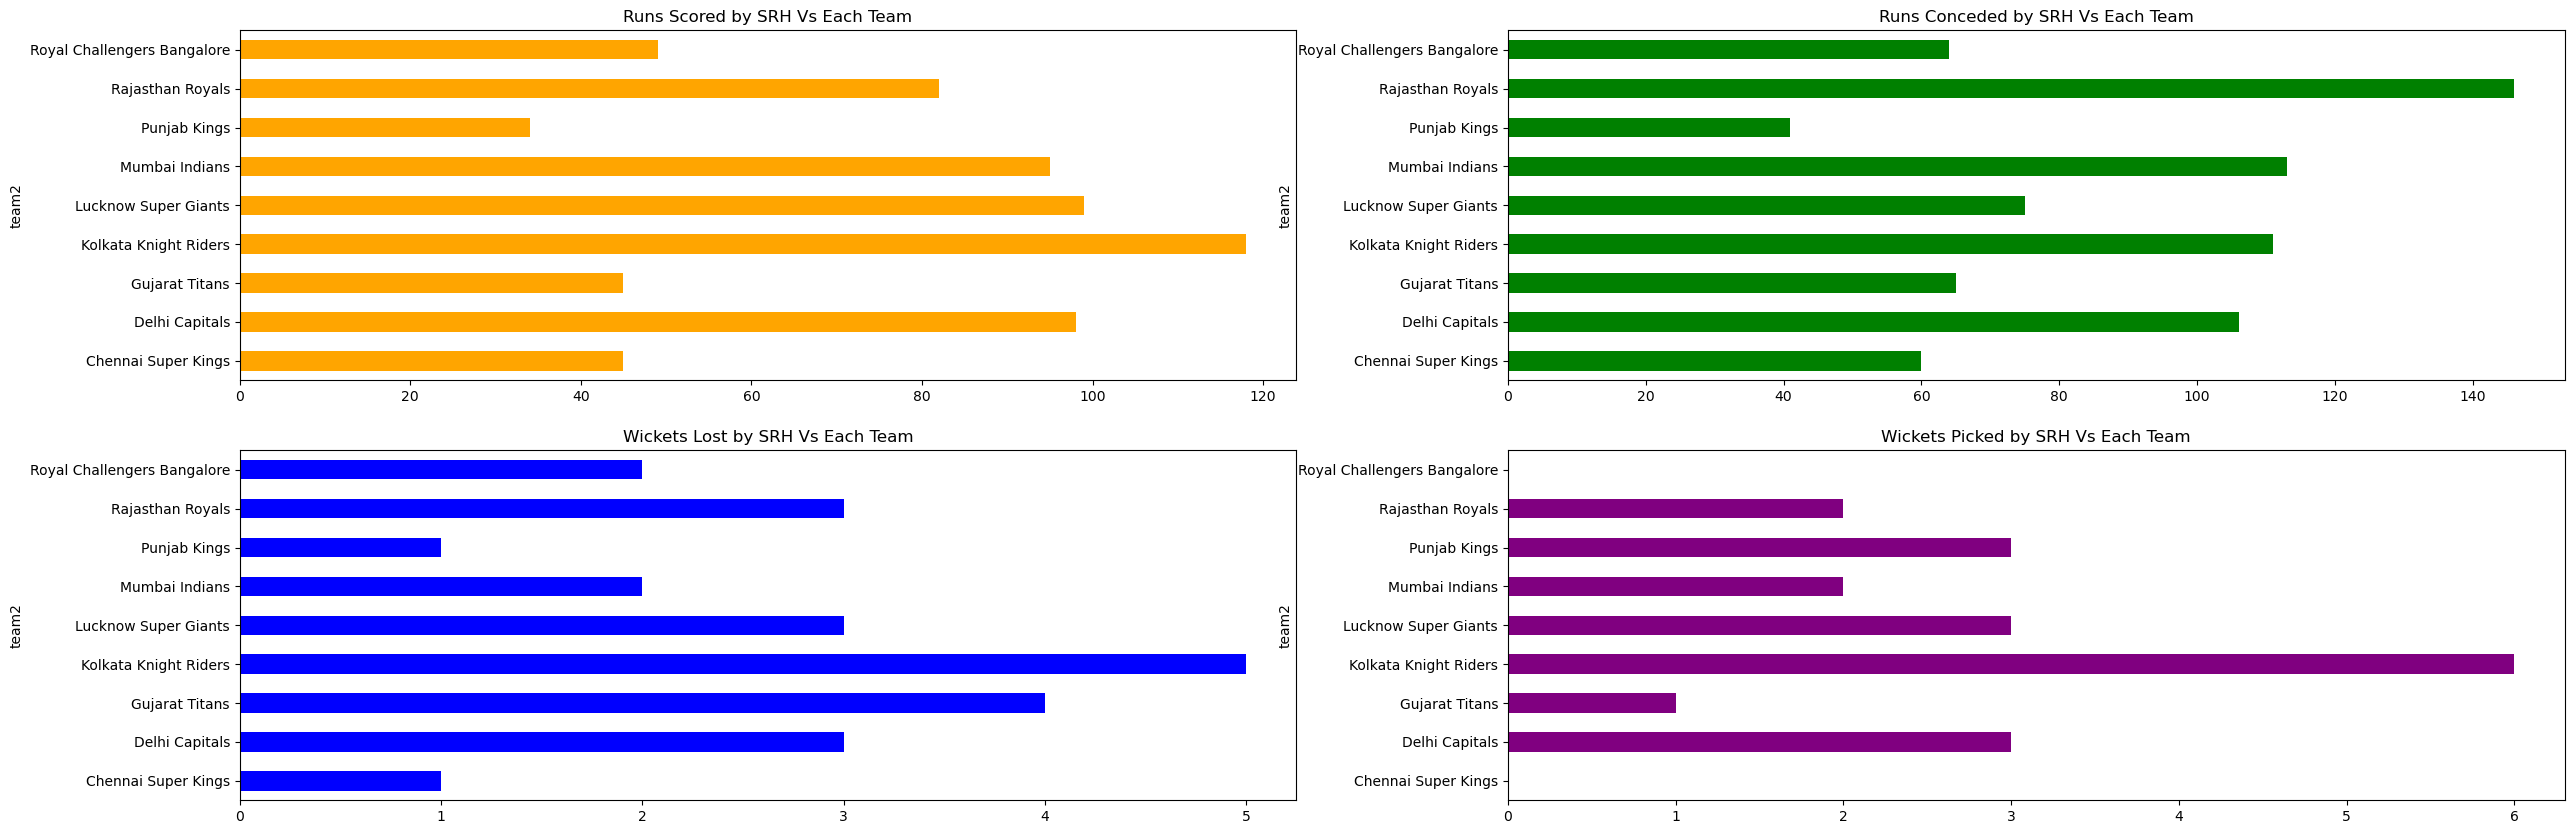

In [111]:
fig, axaSRH = plt.subplots(2, 2, figsize=(30,10))
SRH.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axaSRH[0][0],title="Runs Scored by SRH Vs Each Team")
SRH.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axaSRH[0][1],title="Runs Conceded by SRH Vs Each Team")
SRH.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axaSRH[1][0],title="Wickets Lost by SRH Vs Each Team")
SRH.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Purple",ax=axaSRH[1][1],title="Wickets Picked by SRH Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

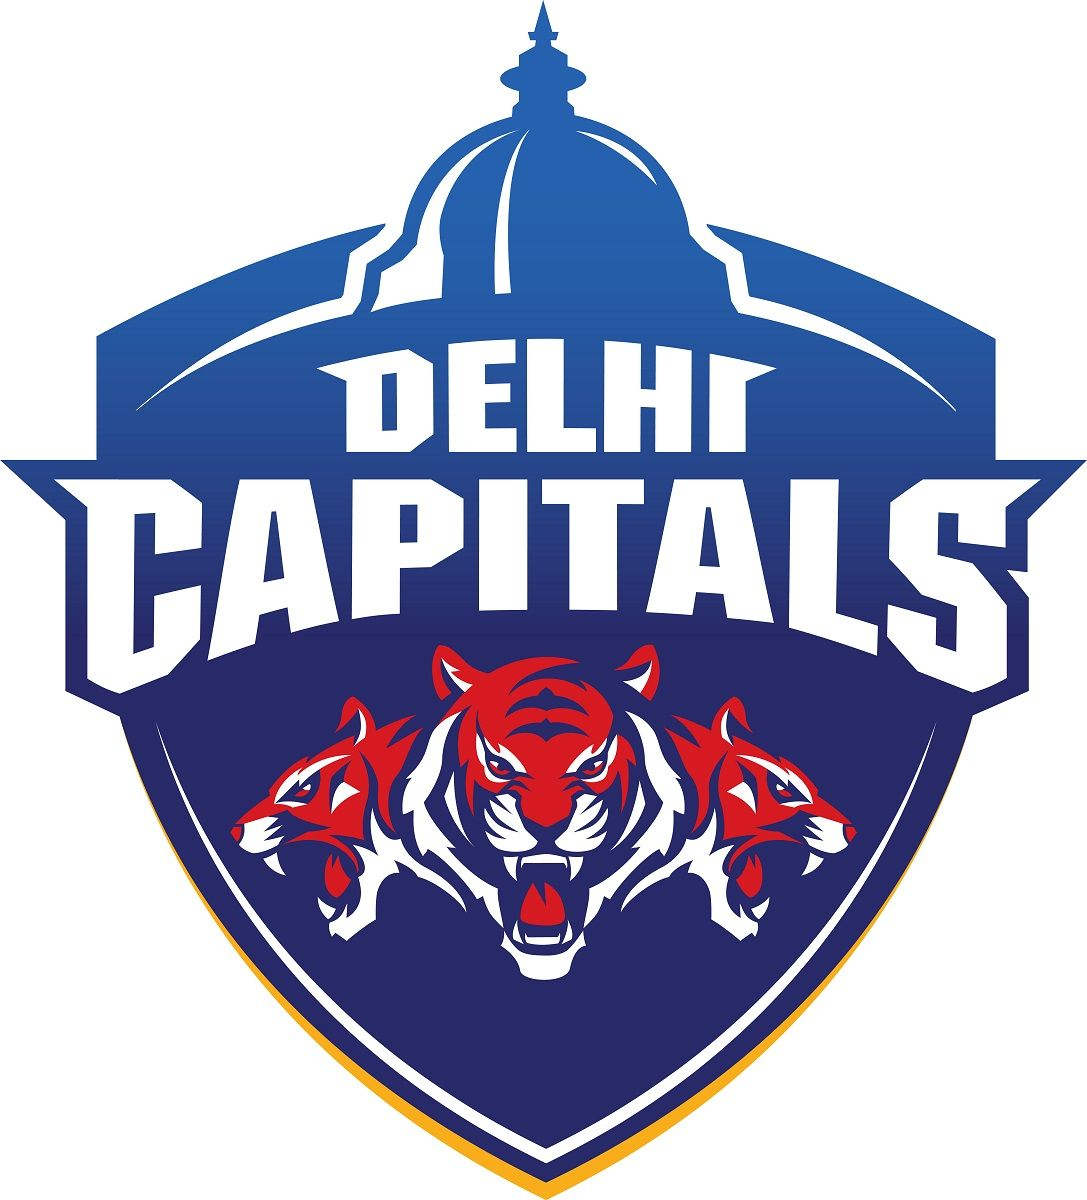

In [56]:
DC = pd.read_excel('DC.xlsx')
DC.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23003,2023,Lucknow,2023-04-01,Delhi Capitals,47,2,Lucknow Super Giants,30,1,Delhi Capitals,bowl,normal,0,Lucknow Super Giants,50,0,Mark Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...
1,23007,2023,Delhi,2023-04-04,Delhi Capitals,52,2,Gujarat Titans,54,3,Gujarat Titans,bowl,normal,0,Gujarat Titans,0,6,Sai Sudharshan,"Arun Jaitley Stadium,Delhi"
2,23011,2023,Guwahati,2023-04-08,Delhi Capitals,38,3,Rajasthan Royals,68,0,Rajasthan Royals,Bowl,normal,0,Rajasthan Royals,57,0,Yashasvi Jaiswal,Baraspara Stadium


In [57]:
PP_Batting(DC)

<---------------------------Number of Wins Team Wise-------------------------------->
Delhi Capitals                 5
Chennai Super Kings            2
Lucknow Super Giants           1
Gujarat Titans                 1
Rajasthan Royals               1
Mumbai Indians                 1
Royal Challengers Bangalore    1
Sunrisers Hyderabad            1
Punjab Kings                   1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
Bowl           Rajasthan Royals               1
bat            Chennai Super Kings            2
               Delhi Capitals                 2
               Royal Challengers Bangalore    1
               Sunrisers Hyderabad            1
bowl           Delhi Capitals                 4
               Gujarat Titans                 1
               Mumbai Indians                 1
               Punjab Kings                   1
Name: toss_winner

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,692.0,28.0,49.43,8.24,70.0,28.0,2.0,5.0,7.0


In [58]:
PP_Bowling(DC)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,676.0,19.0,8.05,84.0,30.0,68.0,3.0


#### Overall Powerplay Runs & Wickets Stats of DC vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by DC Vs Each Team'}, ylabel='team2'>

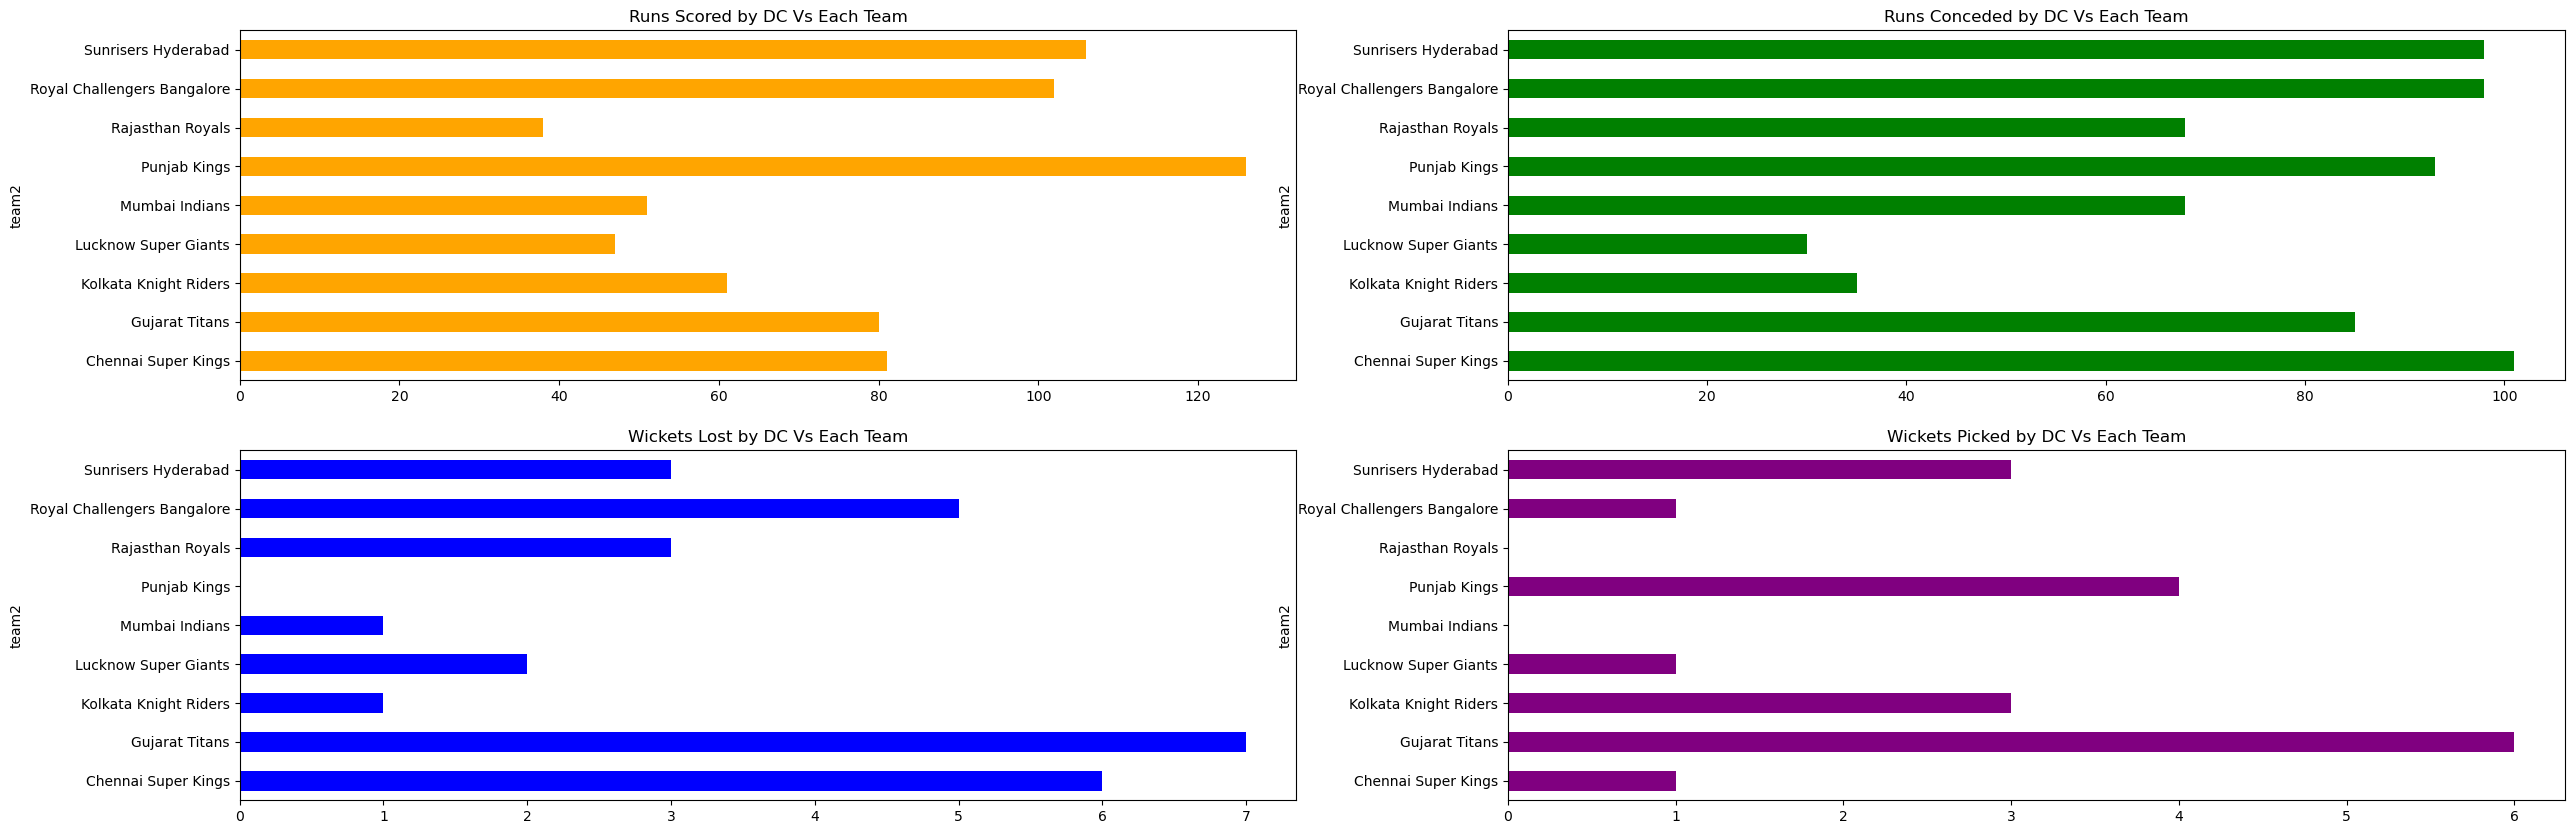

In [59]:
fig, axaDC = plt.subplots(2, 2, figsize=(30,10))
DC.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axaDC[0][0],title="Runs Scored by DC Vs Each Team")
DC.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axaDC[0][1],title="Runs Conceded by DC Vs Each Team")
DC.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axaDC[1][0],title="Wickets Lost by DC Vs Each Team")
DC.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Purple",ax=axaDC[1][1],title="Wickets Picked by DC Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

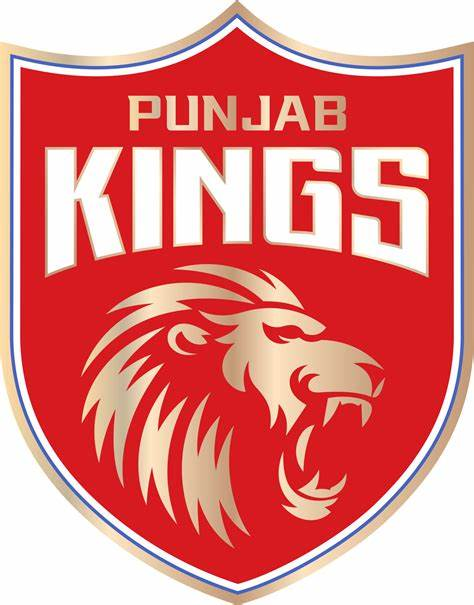

In [60]:
PBKS = pd.read_excel('PBKS.xlsx')
PBKS.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23002,2023,Mohali,2023-04-01,Punjab Kings,56,1,Kolkata Knight Riders,46,3,Kolkata Knight Riders,bowl,normal,0,Punjab Kings,7,0,Arshdeep Singh,IS Bindra Stadium
1,23008,2023,Guwahati,2023-04-05,Punjab Kings,63,0,Rajasthan Royals,57,3,Rajasthan Royals,bowl,normal,0,Punjab Kings,5,0,Nathan Ellis,Baraspara Stadium
2,23014,2023,Hyderabad,2023-04-09,Punjab Kings,41,3,Sunrisers Hyderabad,34,1,Sunrisers Hyderabad,bowl,normal,0,Sunrisers Hyderabad,0,8,Shikhar Dhawan,Rajiv Gandhi Intl. Cricket Stadium


In [61]:
PP_Batting(PBKS)

<---------------------------Number of Wins Team Wise-------------------------------->
Punjab Kings                   6
Sunrisers Hyderabad            1
Gujarat Titans                 1
Royal Challengers Bangalore    1
Lucknow Super Giants           1
Mumbai Indians                 1
Kolkata Knight Riders          1
Delhi Capitals                 1
Rajasthan Royals               1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner          
bat            Chennai Super Kings      1
               Punjab Kings             1
bowl           Punjab Kings             4
               Mumbai Indians           2
               Rajasthan Royals         2
               Delhi Capitals           1
               Gujarat Titans           1
               Kolkata Knight Riders    1
               Sunrisers Hyderabad      1
Name: toss_winner, dtype: int64
<--------------------------------------------

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,14.0,730.0,28.0,52.14,8.69,63.0,41.0,1.0,4.0,6.0


In [62]:
PP_Bowling(PBKS)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,14.0,775.0,15.0,9.23,84.0,34.0,74.0,3.0


#### Overall Powerplay Runs & Wickets Stats of PBKS vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by PBKS Vs Each Team'}, ylabel='team2'>

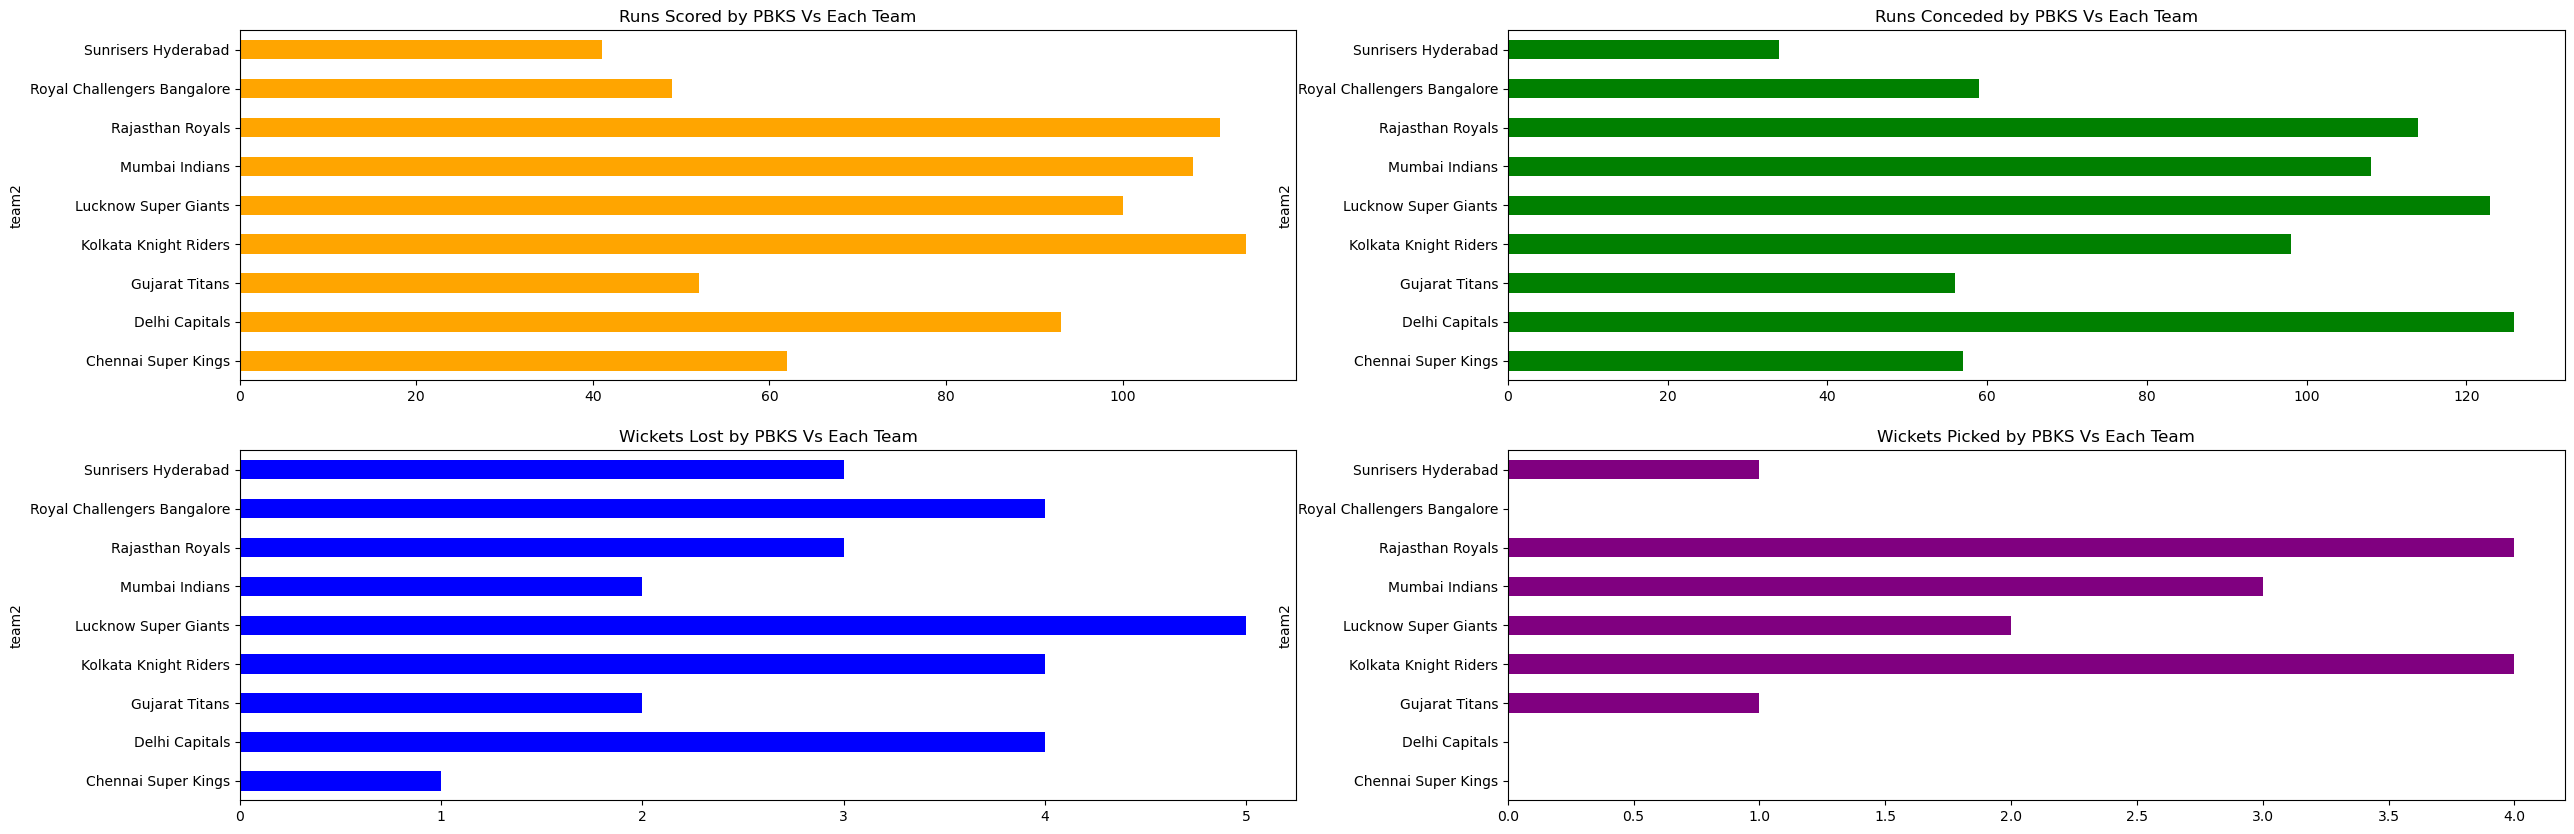

In [63]:
fig, axaPBKS = plt.subplots(2, 2, figsize=(30,10))
PBKS.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axaPBKS[0][0],title="Runs Scored by PBKS Vs Each Team")
PBKS.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axaPBKS[0][1],title="Runs Conceded by PBKS Vs Each Team")
PBKS.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axaPBKS[1][0],title="Wickets Lost by PBKS Vs Each Team")
PBKS.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Purple",ax=axaPBKS[1][1],title="Wickets Picked by PBKS Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

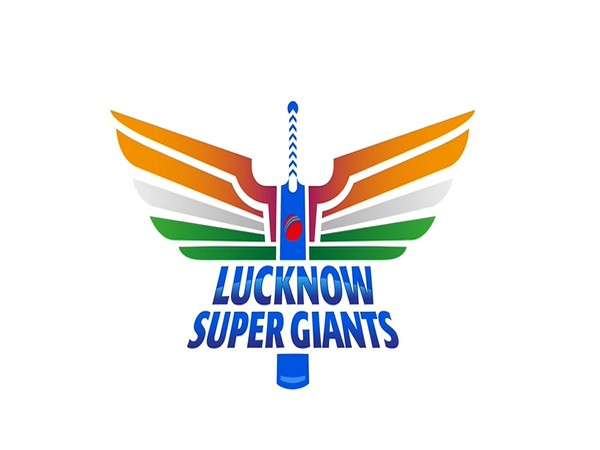

In [64]:
LSG = pd.read_excel('LSG.xlsx')
LSG.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23003,2023,Lucknow,2023-04-01,Lucknow Super Giants,30,1,Delhi Capitals,47.0,2.0,Delhi Capitals,bowl,normal,0,Lucknow Super Giants,50,0,Mark Wood,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...
1,23006,2023,Chennai,2023-04-03,Lucknow Super Giants,80,1,Chennai Super Kings,79.0,0.0,Lucknow Super Giants,bowl,normal,0,Chennai Super Kings,12,0,Moeen Ali,"MA Chidambaram Stadium, Chepauk"
2,23010,2023,Lucknow,2023-04-07,Lucknow Super Giants,45,2,Sunrisers Hyderabad,43.0,1.0,Sunrisers Hyderabad,bat,normal,0,Lucknow Super Giants,0,5,Krunal Pandya,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...


In [65]:
PP_Batting(LSG)

<---------------------------Number of Wins Team Wise-------------------------------->
Lucknow Super Giants           8
Gujarat Titans                 2
Chennai Super Kings            1
Punjab Kings                   1
Royal Challengers Bangalore    1
Mumbai Indians                 1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner                
bat            Sunrisers Hyderabad            2
               Gujarat Titans                 1
               Mumbai Indians                 1
               Royal Challengers Bangalore    1
bowl           Lucknow Super Giants           3
               Punjab Kings                   2
               Chennai Super Kings            1
               Delhi Capitals                 1
               Kolkata Knight Riders          1
               Mumbai Indians                 1
               Rajasthan Royals               1
Name: toss_winner, d

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,15.0,715.0,22.0,47.67,7.94,80.0,30.0,4.0,4.0,7.0


In [66]:
PP_Bowling(LSG)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,15.0,769.0,14.0,8.54,90.0,40.0,79.0,3.0


#### Overall Powerplay Runs & Wickets Stats of LSG vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by LSG Vs Each Team'}, ylabel='team2'>

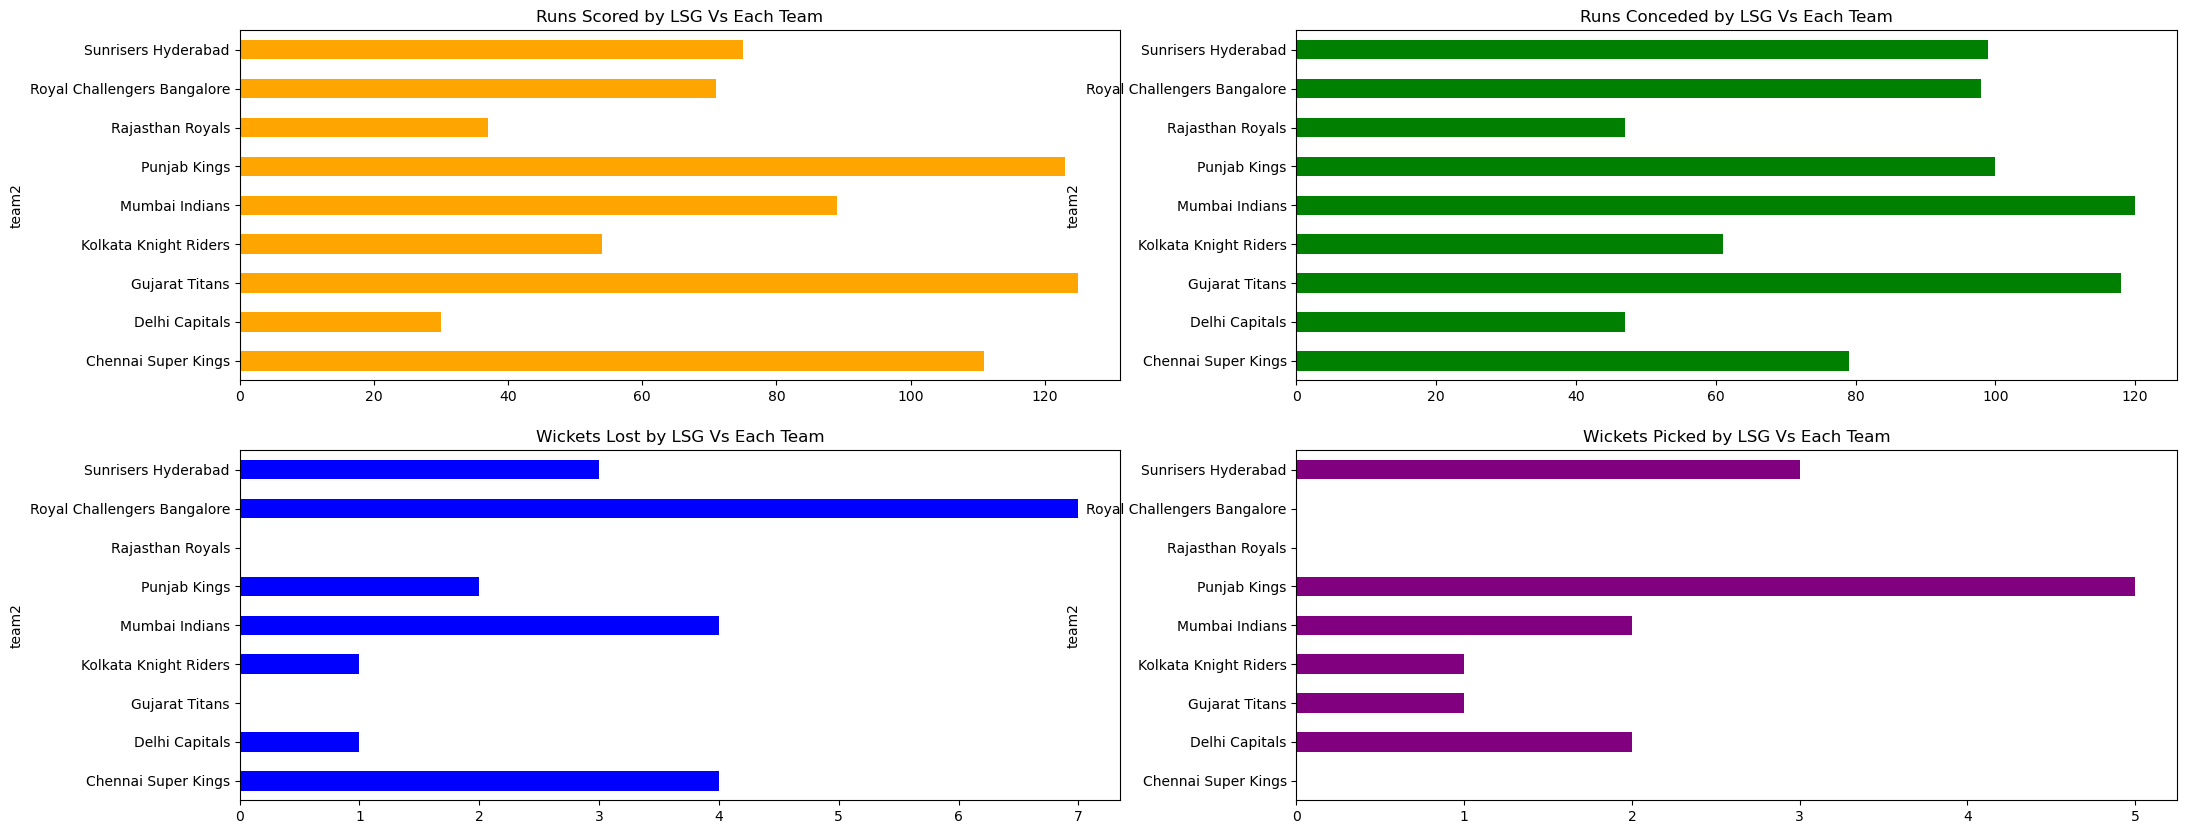

In [67]:
fig, axaLSG = plt.subplots(2, 2, figsize=(25,10))
LSG.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axaLSG[0][0],title="Runs Scored by LSG Vs Each Team")
LSG.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axaLSG[0][1],title="Runs Conceded by LSG Vs Each Team")
LSG.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axaLSG[1][0],title="Wickets Lost by LSG Vs Each Team")
LSG.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Purple",ax=axaLSG[1][1],title="Wickets Picked by LSG Vs Each Team")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

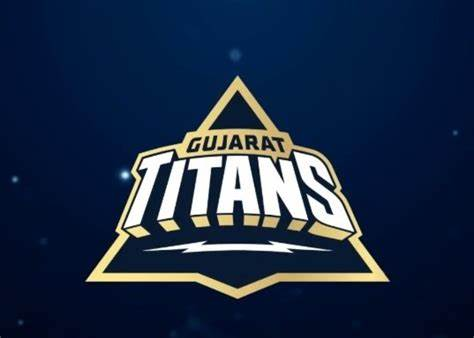

In [68]:
GT = pd.read_excel("GT.xlsx")
GT.head(3)

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,23001,2023,Ahmedabad,2023-03-31,Gujarat Titans,65,2,Chennai Super Kings,51,2,Gujarat Titans,bowl,normal,0,Gujarat Titans,0,5,Rashid Khan,Narendra Modi Stadium
1,23007,2023,Delhi,2023-04-04,Gujarat Titans,54,3,Delhi Capitals,52,2,Gujarat Titans,bowl,normal,0,Gujarat Titans,0,6,Sai Sudharshan,"Arun Jaitley Stadium,Delhi"
2,23013,2023,Ahmedabad,2023-04-09,Gujarat Titans,54,1,Kolkata Knight Riders,43,2,Gujarat Titans,bat,normal,0,Kolkata Knight Riders,0,3,Rinku Singh,Narendra Modi Stadium


In [69]:
PP_Batting(GT)

<---------------------------Number of Wins Team Wise-------------------------------->
Gujarat Titans           11
Chennai Super Kings       2
Kolkata Knight Riders     1
Rajasthan Royals          1
Delhi Capitals            1
Mumbai Indians            1
Name: winner, dtype: int64
<-----------------------Batting Powerplay Stats------------------------------------->
Toss Wins 
 toss_decision  toss_winner         
bat            Gujarat Titans          2
               Delhi Capitals          1
               Rajasthan Royals        1
bowl           Gujarat Titans          7
               Mumbai Indians          2
               Chennai Super Kings     1
               Lucknow Super Giants    1
               Rajasthan Royals        1
               Sunrisers Hyderabad     1
Name: toss_winner, dtype: int64
<--------------------------------------------------------------->
Player of the Match
<--------------------------------------------------------------->
Man of the Match 
 Shubman Gill 

,Matches Played,Runs Scored in PP,wickets_lost,Average Powerplay Score,Runs Per Over,Highest Score in PP,Lowest Score in PP,Number of times Wicketless in PP,Max Wickets lost,No. of Times Score > Mean PP Score
Value,17.0,888.0,22.0,52.24,8.71,78.0,31.0,4.0,3.0,7.0


In [70]:
PP_Bowling(GT)

,Matches Played,Runs Conceeded,Wickets Picked,Economy,Total Overs Bowled,Lowest Conceeded Runs,Highest Conceeded Runs,Max Wickets Picked in PP
Value,17.0,858.0,27.0,8.41,102.0,26.0,72.0,5.0


#### Overall Powerplay Runs & Wickets Stats of GT vs Other Teams

<AxesSubplot:title={'center':'Wickets Picked by GT Vs Each Team'}, ylabel='team2'>

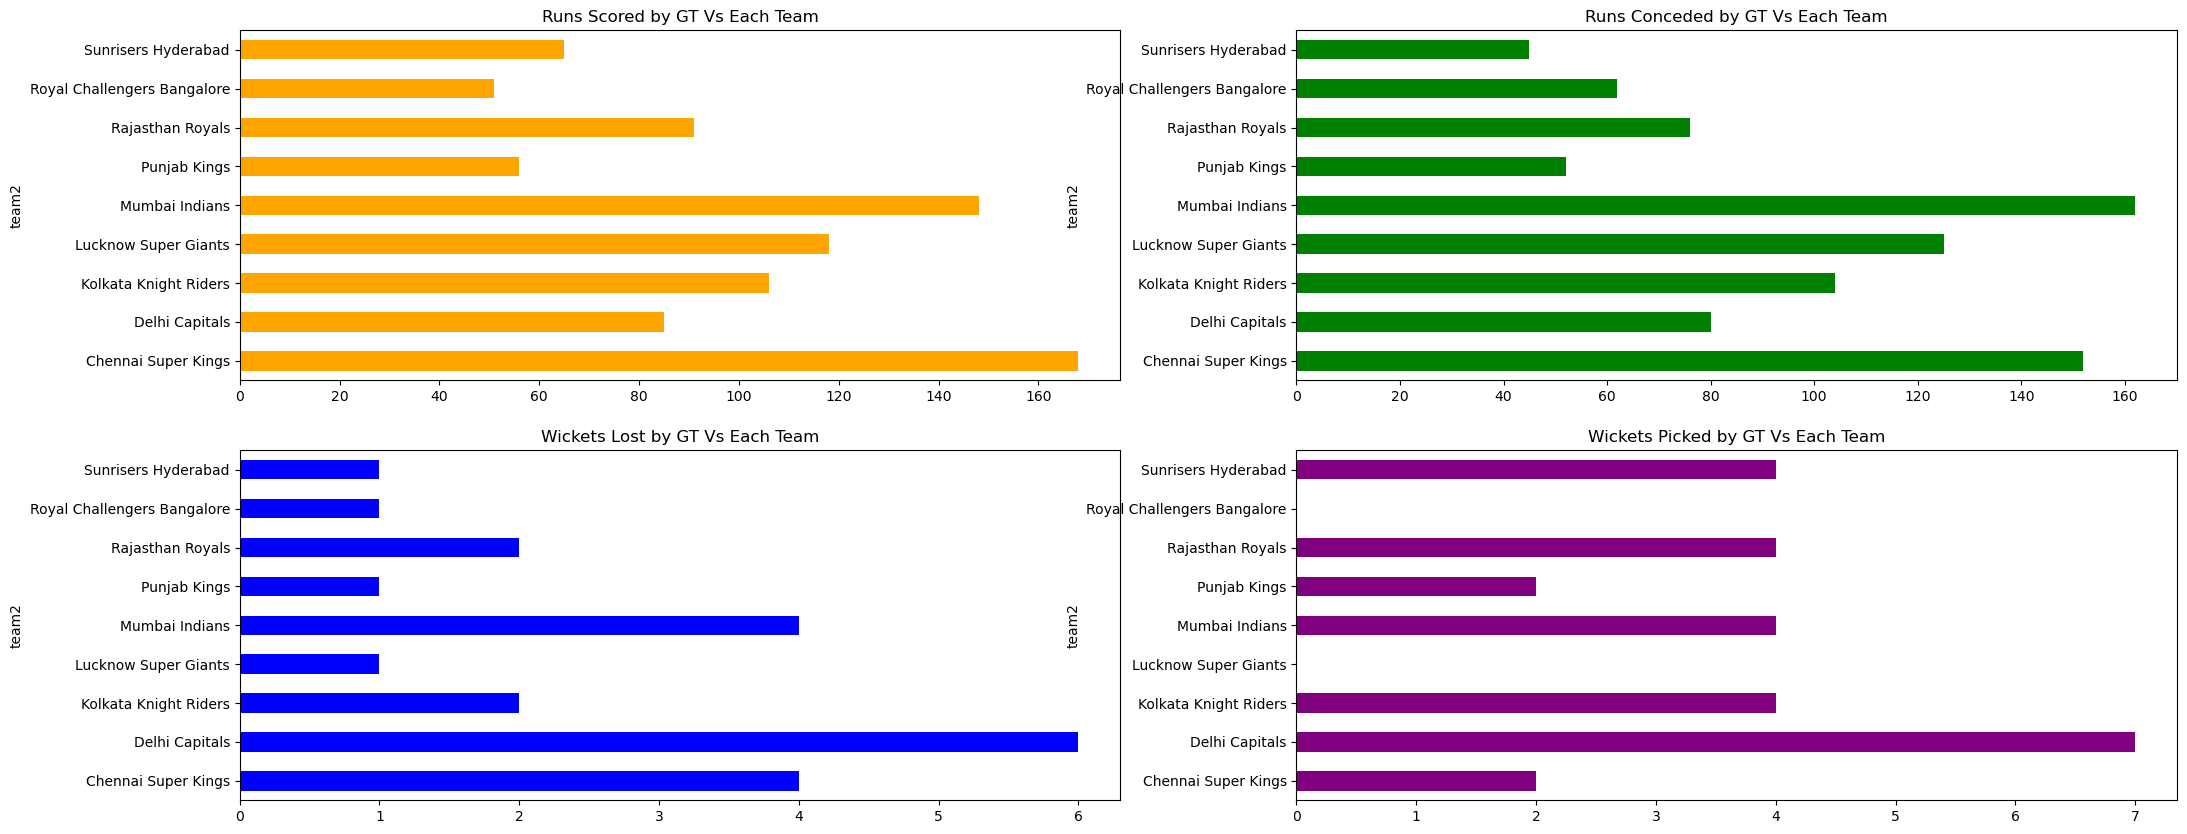

In [71]:
fig, axaGT = plt.subplots(2, 2, figsize=(25,10))
GT.groupby(['team2'])['pplay_s_t1'].sum().plot(kind="barh",color = "Orange",ax=axaGT[0][0],title="Runs Scored by GT Vs Each Team")
GT.groupby(['team2'])['pplay_s_t2'].sum().plot(kind="barh",color = "Green",ax=axaGT[0][1],title="Runs Conceded by GT Vs Each Team")
GT.groupby(['team2'])['pplay_w_t1'].sum().plot(kind="barh",color = "Blue",ax=axaGT[1][0],title="Wickets Lost by GT Vs Each Team")
GT.groupby(['team2'])['pplay_w_t2'].sum().plot(kind="barh",color = "Purple",ax=axaGT[1][1],title="Wickets Picked by GT Vs Each Team")

#### These are just a part of the analysis I have taken 🤐.
#### Especially focused on IPL Powerplay Statistics here. Tells which team have a great start in Powerplay and which team hasn't.
#### Still there's a scope of many stats if we drill down the data. 🤩